# Mitigating paleotemperature bias under no-analogue conditions through quantitative proxy constraints
**Author**: Jie Liang¹²*, Xianwei Liu³, Amedea Perfumo¹⁴*, Lichen Yang⁵, Juzhi Hou², Haichao Xie²*, Fahu Chen², Ulrike Herzschuh¹⁶⁷*  

---

### Article Information 

**Published in**:  

**Affiliations**:  

¹ Polar Terrestrial Environmental Systems, Alfred Wegener Institute Helmholtz Centre for Polar and Marine Research, Telegrafenberg, 14473 Potsdam, Germany  

² Group of Alpine Paleoecology and Human Adaptation (ALPHA), State Key Laboratory of Tibetan Plateau Earth System, Resources and Environment (TPESRE), Institute of Tibetan Plateau Research, Chinese Academy of Sciences, 100101 Beijing, China  

³ Helmholtz Centre Potsdam GFZ German Research Centre for Geosciences, Telegrafenberg, 14473 Potsdam, Germany  

⁴ Chrono-Environnement UMR6249, CNRS, Université Franche-Comté, F-25000 Besançon, France  

⁵ Department of Mathematics, Northeastern University, 02115 Boston, United States  

⁶ Institute of Environmental Science and Geography, University of Potsdam, 14469 Potsdam, Germany  

⁷ Institute of Biochemistry and Biology, University of Potsdam, 14476 Potsdam, Germany  


---
### Notebook Overview  

This Jupyter Notebook presents the data analysis and methods used in the study:

**"Mitigating paleotemperature bias under no-analogue conditions through quantitative proxy constraints"**.  

**Goals of this notebook**:  

- Reproduce the key results from the paper.  
- Provide a clear, step-by-step explanation of the data processing and analysis.  
- Visualize and interpret the results supporting this study.  
---



# Fig. 1 BrGDGT weighted temperature bias mapping

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Polygon
import cartopy.crs as ccrs
from cartopy.feature import BORDERS
import matplotlib as mpl
import numpy as np
import matplotlib.patches as patches

C:\Users\jie liang\AppData\Local\Temp\ipykernel_20188\2900030860.py:19: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: (x['deltaMAF-WC bnn'] * x['weight']).sum() / x['weight'].sum()).reset_index(name='weighted_deltaMAF-WC bnn')
C:\Users\jie liang\AppData\Local\Temp\ipykernel_20188\2900030860.py:36: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: (x['deltaMAF-WC bnn'] * x['weight']).sum() / x['weight'].sum()).reset_index(name='weighted_deltaMAF-WC bnn')
C:\Users\jie liang\AppData\Local\Temp\ipykernel_20188\2900030860.py:59: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jie liang\anaconda3\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has

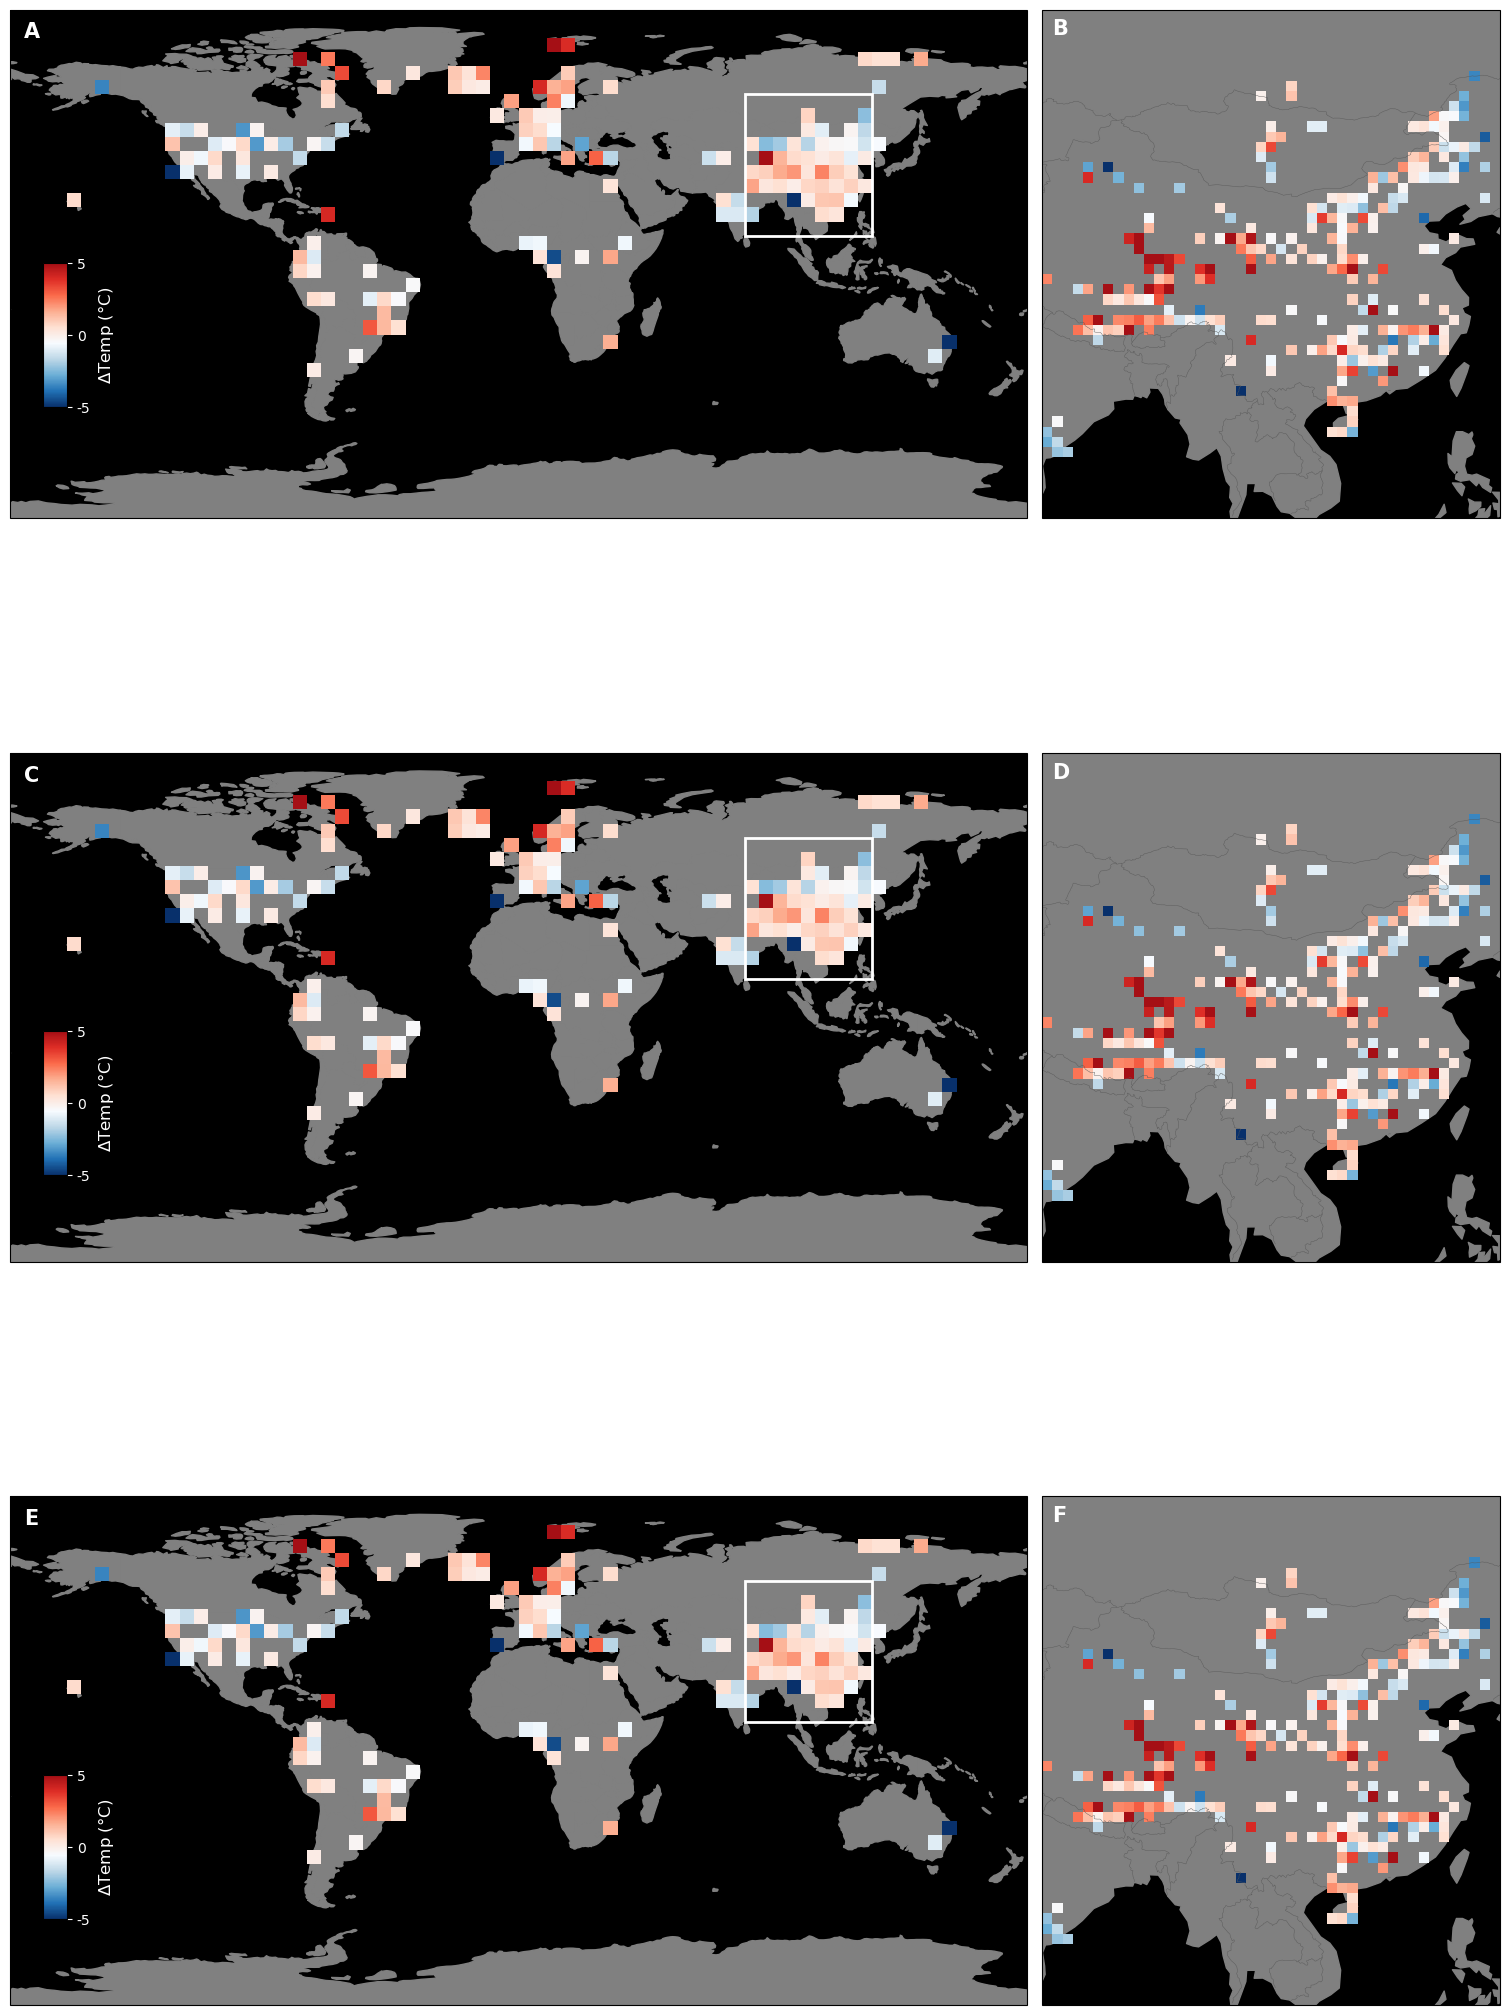

In [11]:
xls = pd.ExcelFile('gloabl soil brGDGT dataset - v1.xlsx')
df_check = pd.read_excel(xls, ' Temperature_Comparison')

# Function to convert points to grid cells
def convert_to_grid(df, cell_size):
    df['grid_lon'] = (df["longitude(°E)"] // cell_size) * cell_size
    df['grid_lat'] = (df["latitude(°N)"] // cell_size) * cell_size
    return df

# Load and prepare data
df = pd.DataFrame(df_check)

# Processing for the 5x5 grid
cell_size_1 = 5
df_1 = convert_to_grid(df.copy(), cell_size_1)
df_1['weight'] = 1 / (1 + abs(df_1['deltaMAF-WC bnn']))

weighted_avg_1 = df_1.groupby(['grid_lon', 'grid_lat']).apply(
    lambda x: (x['deltaMAF-WC bnn'] * x['weight']).sum() / x['weight'].sum()).reset_index(name='weighted_deltaMAF-WC bnn')

grid_polygons_1 = [Polygon([
    (row['grid_lon'], row['grid_lat']), 
    (row['grid_lon'] + cell_size_1, row['grid_lat']), 
    (row['grid_lon'] + cell_size_1, row['grid_lat'] + cell_size_1), 
    (row['grid_lon'], row['grid_lat'] + cell_size_1)
]) for _, row in weighted_avg_1.iterrows()]

grid_1 = gpd.GeoDataFrame({'geometry': grid_polygons_1, 'weighted_deltaMAF-WC bnn': weighted_avg_1['weighted_deltaMAF-WC bnn']})

# Processing for the 1x1 grid
cell_size_2 = 1
df_2 = convert_to_grid(df.copy(), cell_size_2)
df_2['weight'] = 1 / (1 + abs(df_2['deltaMAF-WC bnn']))

weighted_avg_2 = df_2.groupby(['grid_lon', 'grid_lat']).apply(
    lambda x: (x['deltaMAF-WC bnn'] * x['weight']).sum() / x['weight'].sum()).reset_index(name='weighted_deltaMAF-WC bnn')

grid_polygons_2 = [Polygon([
    (row['grid_lon'], row['grid_lat']), 
    (row['grid_lon'] + cell_size_2, row['grid_lat']), 
    (row['grid_lon'] + cell_size_2, row['grid_lat'] + cell_size_2), 
    (row['grid_lon'], row['grid_lat'] + cell_size_2)
]) for _, row in weighted_avg_2.iterrows()]

grid_2 = gpd.GeoDataFrame({'geometry': grid_polygons_2, 'weighted_deltaMAF-WC bnn': weighted_avg_2['weighted_deltaMAF-WC bnn']})

# Define custom colormap
colors = ["#08306b", "#2171b5", "#6baed6", "#bdd7e7", "#f7fbff", "#fee0d2", "#fcae91", "#fb6a4a", "#de2d26", "#a50f15"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)


fig, axs = plt.subplots(3, 2, figsize=(16, 24), subplot_kw={'projection': ccrs.PlateCarree()},
                        gridspec_kw={'width_ratios': [2, 0.9]})

# First row (A)
ax1, ax2 = axs[0]
ax1.set_xlim(-180, 180)
ax1.set_ylim(-90, 90)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax1, color='gray', edgecolor='gray')
ax1.set_facecolor('black')
ax1.text(-175, 80, "A", fontsize=15, color='white', weight='bold')

grid_1.plot(column='weighted_deltaMAF-WC bnn', ax=ax1, legend=False, cmap=cmap, vmin=-5, vmax=5)
rect = patches.Rectangle((80, 10), 45, 50, linewidth=2, edgecolor='white', facecolor='none')
ax1.add_patch(rect)

ax2.set_xlim(80, 125)
ax2.set_ylim(10, 60)
ax2.add_feature(BORDERS, linestyle='-', linewidth=0.3, color='#585858')
world.plot(ax=ax2, color='gray', edgecolor='gray')
ax2.set_facecolor('black')
grid_2.plot(column='weighted_deltaMAF-WC bnn', ax=ax2, legend=False, cmap=cmap, vmin=-5, vmax=5)
ax2.text(81, 57.5, "B", fontsize=15, color='white', weight='bold')

# Add the continuous colorbar to the left of the first row
norm = mpl.colors.Normalize(vmin=-5, vmax=5)
cax1 = fig.add_axes([0.08, 0.75, 0.015, 0.06])  # Adjust these values to move the colorbar
sm1 = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, cax=cax1, ticks=[-5, 0, 5])
cbar1.ax.set_yticklabels(['-5', '0', '5'], color='white')
cbar1.set_label(r'$\Delta$Temp (°C)', fontsize=12, color='white')
cbar1.ax.yaxis.set_tick_params(color='white')

# Second row (B)
ax3, ax4 = axs[1]
ax3.set_xlim(-180, 180)
ax3.set_ylim(-90, 90)
world.plot(ax=ax3, color='gray', edgecolor='gray')
ax3.set_facecolor('black')
ax3.text(-175, 80, "C", fontsize=15, color='white', weight='bold')

grid_1.plot(column='weighted_deltaMAF-WC bnn', ax=ax3, legend=False, cmap=cmap, vmin=-5, vmax=5)
rect = patches.Rectangle((80, 10), 45, 50, linewidth=2, edgecolor='white', facecolor='none')
ax3.add_patch(rect)

ax4.set_xlim(80, 125)
ax4.set_ylim(10, 60)
ax4.add_feature(BORDERS, linestyle='-', linewidth=0.3, color='#585858')
world.plot(ax=ax4, color='gray', edgecolor='gray')
ax4.set_facecolor('black')
ax4.text(81, 57.5, "D", fontsize=15, color='white', weight='bold')
grid_2.plot(column='weighted_deltaMAF-WC bnn', ax=ax4, legend=False, cmap=cmap, vmin=-5, vmax=5)

w
cax2 = fig.add_axes([0.08, 0.43, 0.015, 0.06])  # Adjust these values to move the colorbar
sm2 = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, cax=cax2, ticks=[-5, 0, 5])
cbar2.ax.set_yticklabels(['-5', '0', '5'], color='white')
cbar2.set_label(r'$\Delta$Temp (°C)', fontsize=12, color='white')
cbar2.ax.yaxis.set_tick_params(color='white')


ax5, ax6 = axs[2]
ax5.set_xlim(-180, 180)
ax5.set_ylim(-90, 90)
world.plot(ax=ax5, color='gray', edgecolor='gray')
ax5.set_facecolor('black')
ax5.text(-175, 80, "E", fontsize=15, color='white', weight='bold')

grid_1.plot(column='weighted_deltaMAF-WC bnn', ax=ax5, legend=False, cmap=cmap, vmin=-5, vmax=5)
rect = patches.Rectangle((80, 10), 45, 50, linewidth=2, edgecolor='white', facecolor='none')
ax5.add_patch(rect)

ax6.set_xlim(80, 125)
ax6.set_ylim(10, 60)
ax6.add_feature(BORDERS, linestyle='-', linewidth=0.3, color='#585858')
world.plot(ax=ax6, color='gray', edgecolor='gray')
ax6.set_facecolor('black')
ax6.text(81, 57.5, "F", fontsize=15, color='white', weight='bold')
grid_2.plot(column='weighted_deltaMAF-WC bnn', ax=ax6, legend=False, cmap=cmap, vmin=-5, vmax=5)


cax3 = fig.add_axes([0.08, 0.12,  0.015, 0.06]) 
sm3 = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm3.set_array([])
cbar3 = fig.colorbar(sm3, cax=cax3, ticks=[-5, 0, 5])
cbar3.ax.set_yticklabels(['-5', '0', '5'], color='white')
cbar3.set_label(r'$\Delta$Temp (°C)', fontsize=12, color='white')
cbar3.ax.yaxis.set_tick_params(color='white')

plt.tight_layout(rect=[0.05, 0, 1, 1])  # Adjust layout to make room for the colorbars
plt.show()


C:\Users\jie liang\AppData\Local\Temp\ipykernel_31532\580341999.py:44: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\jie liang\AppData\Local\Temp\ipykernel_31532\580341999.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_grids_1['center_lon'] = filtered_grids_1['grid_lon'] + cell_size_1 / 2
C:\Users\jie liang\AppData\Local\Temp\ipykernel_31532\580341999.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

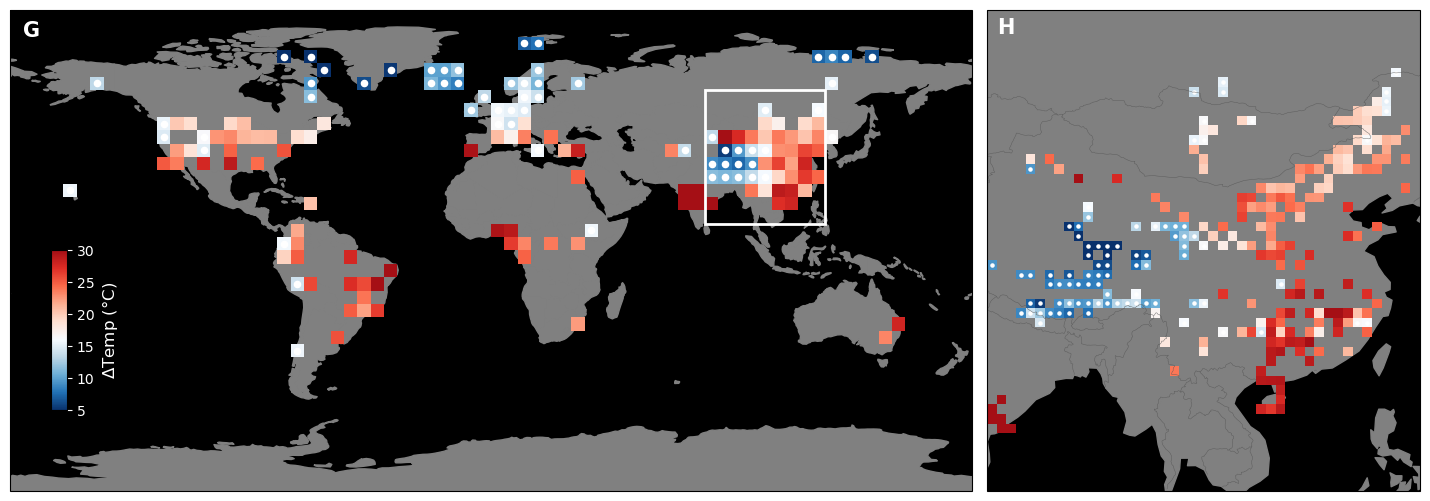

In [6]:


cell_size_1 = 5
df_1 = convert_to_grid(df.copy(), cell_size_1)
grid_means_1 = df_1.groupby(['grid_lon', 'grid_lat'])['MWT_Soil(°C)'].mean().reset_index()
filtered_grids_1 = grid_means_1[grid_means_1['MWT_Soil(°C)'] < 17]


grid_polygons_1 = [Polygon([
    (row['grid_lon'], row['grid_lat']), 
    (row['grid_lon'] + cell_size_1, row['grid_lat']), 
    (row['grid_lon'] + cell_size_1, row['grid_lat'] + cell_size_1), 
    (row['grid_lon'], row['grid_lat'] + cell_size_1)
]) for _, row in grid_means_1.iterrows()]

grid_1 = gpd.GeoDataFrame({'geometry': grid_polygons_1, 'MWT_Soil(°C)': grid_means_1['MWT_Soil(°C)']})


cell_size_2 = 1
df_2 = convert_to_grid(df.copy(), cell_size_2)
grid_means_2 = df_2.groupby(['grid_lon', 'grid_lat'])['MWT_Soil(°C)'].mean().reset_index()
filtered_grids_2 = grid_means_2[grid_means_2['MWT_Soil(°C)'] < 17]


grid_polygons_2 = [Polygon([
    (row['grid_lon'], row['grid_lat']), 
    (row['grid_lon'] + cell_size_2, row['grid_lat']), 
    (row['grid_lon'] + cell_size_2, row['grid_lat'] + cell_size_2), 
    (row['grid_lon'], row['grid_lat'] + cell_size_2)
]) for _, row in grid_means_2.iterrows()]

grid_2 = gpd.GeoDataFrame({'geometry': grid_polygons_2, 'MWT_Soil(°C)': grid_means_2['MWT_Soil(°C)']})


colors = ["#08306b", "#2171b5", "#6baed6", "#bdd7e7", "#f7fbff", "#fee0d2", "#fcae91", "#fb6a4a", "#de2d26", "#a50f15"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()},
                               gridspec_kw={'width_ratios': [2, 0.9]})


ax1.set_xlim(-180, 180)
ax1.set_ylim(-90, 90)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax1, color='gray', edgecolor='gray')
ax1.set_facecolor('black')


#ax1.text(50, -60, r"Weighed $\Delta Temp_{linear}$", fontsize=15, color='white', weight='bold')
ax1.text(-175, 80, "G", fontsize=15, color='white', weight='bold')

grid_1.plot(column='MWT_Soil(°C)', ax=ax1, legend=False, cmap=cmap, vmin=5, vmax=30)

rect = patches.Rectangle((80, 10), 45, 50, linewidth=2, edgecolor='white', facecolor='none')
ax1.add_patch(rect)


filtered_grids_1['center_lon'] = filtered_grids_1['grid_lon'] + cell_size_1 / 2
filtered_grids_1['center_lat'] = filtered_grids_1['grid_lat'] + cell_size_1 / 2
ax1.scatter(filtered_grids_1['center_lon'], filtered_grids_1['center_lat'],color='white', edgecolor='white', s=20, marker='o', label="MWT_Soil(°C) < 17")


ax2.set_xlim(80, 125)
ax2.set_ylim(10, 60)
ax2.add_feature(BORDERS, linestyle='-', linewidth=0.3, color='#585858')
world.plot(ax=ax2, color='gray', edgecolor='gray')
ax2.set_facecolor('black')

grid_2.plot(column='MWT_Soil(°C)', ax=ax2, legend=False, cmap=cmap, vmin=5, vmax=30)

# Scatter plot of filtered grid centers for 1x1 grid
filtered_grids_2['center_lon'] = filtered_grids_2['grid_lon'] + cell_size_2 / 2
filtered_grids_2['center_lat'] = filtered_grids_2['grid_lat'] + cell_size_2 / 2
ax2.scatter(filtered_grids_2['center_lon'], filtered_grids_2['center_lat'], color='white', edgecolor='white', s=5, marker='o', label="MWT_Soil(°C) < 17")
ax2.text(81, 57.5, "H", fontsize=15, color='white', weight='bold')

norm = mpl.colors.Normalize(vmin=5, vmax=30)
cax = fig.add_axes([0.035, 0.3, 0.01, 0.2]) 
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, ticks=[5, 10,15,20, 25, 30])  # Set specific ticks
cbar.ax.set_yticklabels(['5', '10', '15', '20', '25', '30'], color='white')  # Set tick labels and their color
cbar.set_label(r'$\Delta$Temp (°C)', fontsize=12, color='white')


cbar.ax.yaxis.set_tick_params(color='white')

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()


C:\Users\jie liang\AppData\Local\Temp\ipykernel_19052\606771226.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (group, data) in enumerate(df_test.groupby('MAF_group')):
C:\Users\jie liang\AppData\Local\Temp\ipykernel_19052\606771226.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (group, data) in enumerate(df_test.groupby('MAF_group')):


Raw Areas: {(0, 9): 32.463945420645096, (9, 25): 12.74253382260706, (25, 30): -3.1464341227376273}
Lengths of each range: {(0, 9): 9, (9, 25): 16, (25, 30): 5}
Edge effect: 2.54
Ecological: 0.8
Statistical & ENV Contribution: 1.75


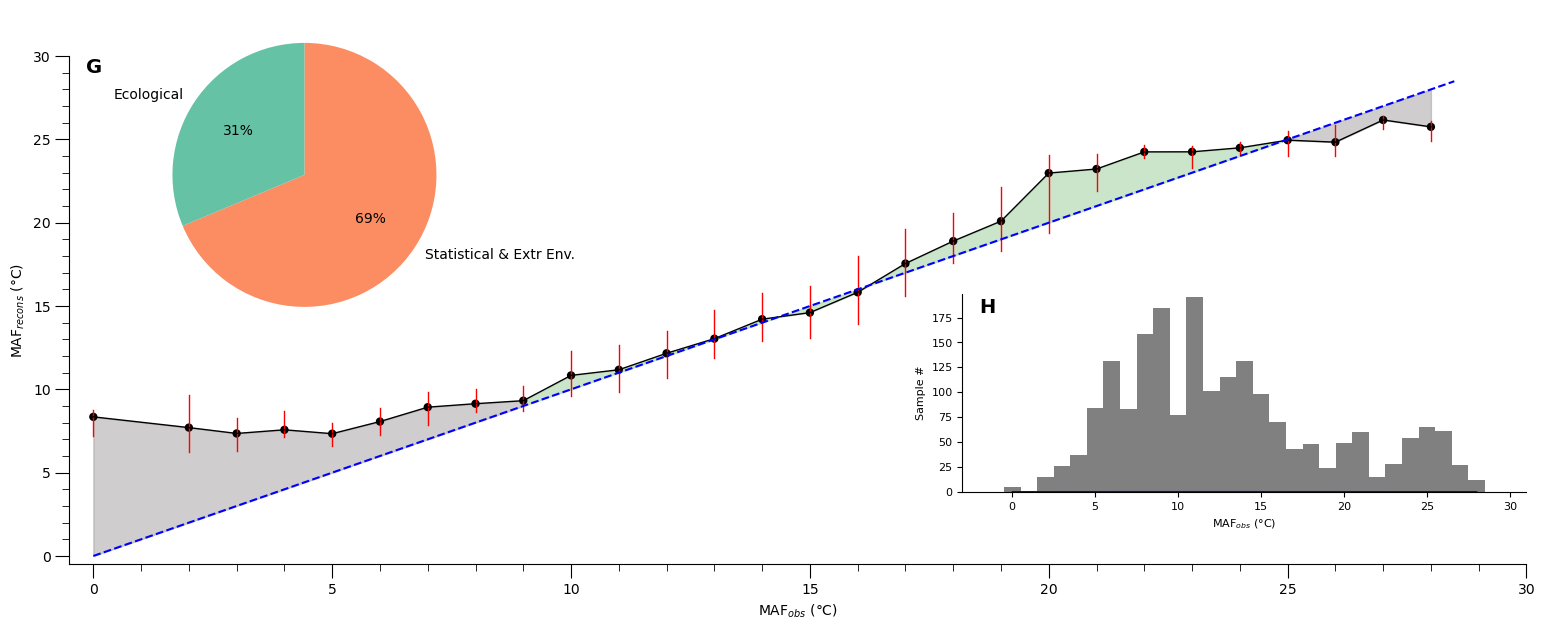

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Read the data
xls = pd.ExcelFile('gloabl soil brGDGT dataset - v2.xlsx')
df_ENV0 = pd.read_excel(xls, 'ENV')
df_brGDGT = pd.read_excel(xls, 'brGDGT')
df_ENV = pd.concat([df_ENV0.iloc[:, 3:31]])
df_test = pd.concat([df_ENV, df_brGDGT], axis=1)

# Define groups based on MAF (°C) ranges with 1-degree intervals
bins = np.arange(0, 31, 1)
df_test['MAF_group'] = pd.cut(df_test['MAF (°C)'], bins=bins, right=False)

# Initialize lists to store median points for the connecting line
x_medians = []
y_medians = []

# Calculate medians for each group
for i, (group, data) in enumerate(df_test.groupby('MAF_group')):
    if not data.empty:
        median_pred = data['MAFterr_soil.pred_BNN'].median()
        x_pos = int(group.left)
        x_medians.append(x_pos)
        y_medians.append(median_pred)


ranges = [(0, 9), (9, 25), (25, 30)]  # Ensure continuous ranges
colors = ['#A09D9C', '#99cc99', '#A09D9C']

# Calculate areas for specified ranges
areas = {}
lengths = {}
for start, end in ranges:
    # Mask the data points within the specified range
    mask = (np.array(x_medians) >= start) & (np.array(x_medians) <= end)
    x_subset = np.array(x_medians)[mask]
    y_subset = np.array(y_medians)[mask]
    y_11_line = x_subset  # 1:1 line values
    
    # Calculate the area between the curve and 1:1 line using medians
    area = np.trapz(y_subset - y_11_line, x_subset)
    areas[(start, end)] = area
    lengths[(start, end)] = end - start  # Calculate the length of each range


print("Raw Areas:", areas)
print("Lengths of each range:", lengths)


normalized_areas = {k: round(abs(v) / lengths[k], 2) for k, v in areas.items()}
total_normalized_area = sum(normalized_areas.values())


stat_env_bio_contribution = (abs(areas[(0, 9)]) + abs(areas[(25, 30)])) / (lengths[(0, 9)] + lengths[(25, 30)])
env_bio_contribution = abs(areas[(9, 25)]) / lengths[(9, 25)]


print("Edge effect:", round(stat_env_bio_contribution, 2))
print("Ecological:", round(env_bio_contribution, 2))


stat_contribution = stat_env_bio_contribution - env_bio_contribution
print("Statistical & ENV Contribution:", round(stat_contribution, 2))


plt.figure(figsize=(18.8, 6.6))
for (start, end), color in zip(ranges, colors):
    mask = (np.array(x_medians) >= start) & (np.array(x_medians) <= end)
    x_subset = np.array(x_medians)[mask]
    y_subset = np.array(y_medians)[mask]
    y_11_line = x_subset  # 1:1 line values

    plt.fill_between(x_subset, y_subset, y_11_line, color=color, alpha=0.5)


x_medians, y_medians, sample_counts, group_labels = [], [], [], []


for i, (group, data) in enumerate(df_test.groupby('MAF_group')):
    if not data.empty:
        # Calculate the median, 25th, and 75th percentiles for MAFterr_soil.pred_BNN in each group
        median_pred = data['MAFterr_soil.pred_BNN'].median()
        y_q1 = data['MAFterr_soil.pred_BNN'].quantile(0.25)
        y_q3 = data['MAFterr_soil.pred_BNN'].quantile(0.75)
        x_pos = int(group.left)
        x_medians.append(x_pos)
        y_medians.append(median_pred)
        sample_counts.append(len(data))  # Count of samples in the group
        group_labels.append(x_pos)    # Use the lower bound of the group as the label
        
        plt.plot([x_pos, x_pos], [y_q1, y_q3], color='red', linewidth=1)  # IQR line
        plt.scatter(x_pos, median_pred, color='black', marker='o', edgecolors='none')  # Solid filled median point

plt.plot(x_medians, y_medians, color='black', linestyle='-', linewidth=1)

# Plotting a 1:1 line
max_value = max(df_test['MAFterr_soil.pred_BNN'].max(), df_test['MAF (°C)'].max())
plt.plot([0, max_value], [0, max_value], color='blue', linestyle='--')

plt.xlabel('MAF$_{obs}$ (°C)')
plt.ylabel('MAF$_{recons}$ (°C)')
plt.grid(False)
plt.text(-0.16, 29, 'G', fontsize=14, fontweight='bold')


plt.xlim(-0.5, 30)
plt.ylim(-0.5, 30)
plt.xticks(np.arange(0, 31, 5))
plt.yticks(np.arange(0, 31, 5))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().tick_params(axis='x', which='major', length=10)
plt.gca().tick_params(axis='y', which='major', length=10)
plt.gca().tick_params(axis='x', which='minor', length=5)
plt.gca().tick_params(axis='y', which='minor', length=5)


for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)


pie_ax = plt.axes([0.05, 0.45, 0.4, 0.5])  
labels = ['Statistical & Extr Env.', 'Ecological']
sizes = [stat_contribution, env_bio_contribution]
colors = ['#fc8d62','#66c2a5',]

pie_ax.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90, counterclock=False)


inset_ax = plt.axes([0.6, 0.22, 0.3, 0.3])
inset_ax.bar(group_labels, sample_counts, color='#808080', width=1, edgecolor='none')
inset_ax.set_xlabel(('MAF$_{obs}$ (°C)'), fontsize=8)
inset_ax.set_ylabel('Sample #', fontsize=8)
inset_ax.tick_params(axis='x', labelsize=8)
inset_ax.tick_params(axis='y', labelsize=8)
inset_ax.set_xlim(-3, 30 + 1)
inset_ax.set_ylim(0, max(sample_counts) + 3)

density = gaussian_kde(group_labels, weights=sample_counts)
x_dens = np.linspace(min(group_labels), max(group_labels), 100)
y_dens = density(x_dens)
inset_ax.plot(x_dens, y_dens, color='blue', linestyle='-', linewidth=1)


for spine in inset_ax.spines.values():
    spine.set_visible(False)
inset_ax.spines['bottom'].set_visible(True)
inset_ax.spines['left'].set_visible(True)
inset_ax.text(-2, 180, 'H', fontsize=14, fontweight='bold')

plt.show()


# Fig. 2 BrGDGT temperature bias analysis and influencing factors using ML

## Step 1: Set up

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import cartopy.crs as ccrs
import xgboost as xgb
import random


from plotnine import *
from sklearn.mixture import GaussianMixture
from cartopy.feature import COASTLINE, BORDERS, LAND
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point, Polygon
from numpy import mean, std
from sklearn.datasets import make_regression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error,mean_squared_error
from tqdm import tqdm


from sklearn.preprocessing import StandardScaler 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import partial_dependence
from lightgbm import LGBMRegressor
from matplotlib.colors import BoundaryNorm
from skmisc.loess import loess
import warnings
import optuna
import logging

optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
random.seed(42)
np.random.seed(42)

In [34]:
import pkg_resources

packages = [
    "numpy", "pandas", "seaborn", "shap", "matplotlib", 
    "geopandas", "cartopy", "xgboost", "plotnine", 
    "scikit-learn", "lightgbm", "optuna"
]

for package in packages:
    try:
        version = pkg_resources.get_distribution(package).version
        print(f"{package}: {version}")
    except pkg_resources.DistributionNotFound:
        print(f"{package} is not installed.")


numpy: 1.26.4
pandas: 2.1.4
seaborn: 0.13.0
shap: 0.45.0
matplotlib: 3.6.2
geopandas: 0.14.3
cartopy: 0.22.0
xgboost: 2.0.0
plotnine: 0.12.3
scikit-learn: 1.5.0
lightgbm: 4.1.0
optuna: 3.6.1


## Step 2: Data loading and pre-process modification

In [92]:
xls = pd.ExcelFile('gloabl soil brGDGT dataset - V2.xlsx')
df_ENV0 = pd.read_excel(xls, 'ENV')
df_brGDGT = pd.read_excel(xls, 'brGDGT')
df_ENV = pd.concat([df_ENV0.iloc[:,3:31]])
df_ENV.columns

Index(['Slope', 'Aspect', 'pH', 'AWC (%)', 'SOC (g/kg)',
       'Soil moisture(m^3/m^-3)', 'MAT_Soil (°C)', 'MAF_Soil (°C)',
       'MSummerT_Soil (°C)', 'MWinterT_Soil (°C)', 'WMT_Soil (°C)',
       'MCT_Soil (°C)', 'SeasonalityT_Soil (°C)', 'Silt (%)', 'Sand (%)',
       'Bared soil (%)', 'Grass (%)', 'Tree (%)', 'Preciptation (mm)',
       'Preciptation_WM (mm)', 'Preciptation_CM (mm)', 'MAT (°C)', 'MAF (°C)',
       'MSummerT (°C)', 'MWinterT (°C)', 'WMT (°C)', 'CMT (°C)',
       'Seasonality (°C)'],
      dtype='object')

In [71]:
def cal_vif(x):
    # Impute missing values using KNNImputer
    imputer = KNNImputer(n_neighbors=round(math.sqrt(len(x.index))))
    x_imputed = imputer.fit_transform(x)

    # Convert imputed data back to DataFrame to retain column names
    x_imputed = pd.DataFrame(x_imputed, columns=x.columns)
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_imputed)
    x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
    
    thresh = 5
    output = pd.DataFrame()
    k = x_scaled.shape[1]
    vif = [variance_inflation_factor(x_scaled.values, i) for i in range(x_scaled.shape[1])]
    
    for i in range(1, k):
        a = np.argmax(vif)
        if vif[a] < thresh:
            break
        if i == 1:
            output = x_scaled.drop(x_scaled.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1:
            output = output.drop(output.columns[a], axis=1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    
    return output


selected_feature = cal_vif(df_ENV)
selected_feature.columns

Index(['Slope', 'Aspect', 'pH', 'AWC (%)', 'SOC (g/kg)',
       'Soil moisture(m^3/m^-3)', 'Silt (%)', 'Sand (%)', 'Bared soil (%)',
       'Grass (%)', 'Tree (%)', 'Preciptation_WM (mm)', 'Preciptation_CM (mm)',
       'WMT (°C)', 'Seasonality (°C)'],
      dtype='object')

In [96]:
df_DM_BNN = df_brGDGT[['deltaMAF-BNN']]# ,'MAFterr_soil.pred_BNN'
df_variable = df_ENV[selected_feature.columns.tolist()]
df_variable = pd.concat([df_variable, df_DM_BNN], axis=1)
imputer = KNNImputer(n_neighbors = round(math.sqrt(len(df_variable.index))))
df_variable = pd.DataFrame(imputer.fit_transform(df_variable),columns = df_variable.columns)

In [98]:
print(df_variable.columns)

Index(['Slope', 'Aspect', 'pH', 'AWC (%)', 'SOC (g/kg)',
       'Soil moisture(m^3/m^-3)', 'Silt (%)', 'Sand (%)', 'Bared soil (%)',
       'Grass (%)', 'Tree (%)', 'Preciptation_WM (mm)', 'Preciptation_CM (mm)',
       'WMT (°C)', 'Seasonality (°C)', 'deltaMAF-BNN'],
      dtype='object')


## Step 3: Train, Evaluate, and Compare Model Performance

In [102]:
X = df_variable.drop(columns=["deltaMAF-BNN"])
y = df_variable[["deltaMAF-BNN"]]

kf = model_selection.RepeatedKFold(n_splits=10, n_repeats=100, random_state = 42)
for train_index, test_index in kf.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]


# Define a function to calculate Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42), 
    "XGBoost": None,  # XGBoost uses a different interface
    "LightGBM": LGBMRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}


results = []

for name, model in tqdm(models.items(), desc="Training Models", unit="model"):
    if name == "XGBoost":
        # Special handling for XGBoost due to different API
        dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
        dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
        params = {"objective": "reg:squarederror", "tree_method": "hist"}
        model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=100)
        y_pred = model.predict(dtest_reg)
    else:
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate R-squared and RMSE for the model
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    # Append the results to the results list
    results.append({"Model": name, "R-squared": r2, "RMSE": rmse})

# Convert the results list to a DataFrame for easier display
results_df = pd.DataFrame(results)

# Format the DataFrame to display R-squared and RMSE with 4 decimal places
styled_table = results_df.style.format({
    "R-squared": "{:.2f}",  # Format R-squared to 2 decimal places
    "RMSE": "{:.2f}"        # Format RMSE to 2 decimal places
}).set_caption("Model Performance Summary")

# Display the formatted table
styled_table


Training Models:  67%|██████████████████████████████████████████▋                     | 4/6 [00:02<00:01,  1.60model/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1915
[LightGBM] [Info] Number of data points in the train set: 1807, number of used features: 15
[LightGBM] [Info] Start training from score 0.444035


Training Models: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.67model/s]


,Model,R-squared,RMSE
0,Gradient Boosting,0.51,1.78
1,Random Forest,0.47,1.87
2,XGBoost,0.45,1.89
3,LightGBM,0.45,1.89
4,Extra Trees,0.42,1.94
5,Decision Tree,0.22,2.26


## Step 4(optimal): Hyperparameter optimization of GBR model (time-intensive process)


> **!Note:**  
> The results of the hyperparameter optimization process, including the optimal parameters identified by Optuna, may vary across different versions of Python and the associated packages (e.g., `numpy`, `scikit-learn`, `optuna`). These differences can arise due to changes in the underlying algorithms, random number generation, and other implementation details.


In [18]:
np.random.seed(1)  # for consistancy
# Data preparation
X = df_variable.drop(columns=["deltaMAF-BNN"])
y = df_variable[["deltaMAF-BNN"]]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def objective(trial):
    # Suggest hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse'])

    # Initialize the model with suggested hyperparameters
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        learning_rate=learning_rate,
        subsample=subsample,
        criterion=criterion,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse



sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)

# Add a progress bar to the optimization process
for _ in tqdm(range(200), desc="Optimizing Hyperparameters"):
    study.optimize(objective, n_trials=1, timeout=None, catch=(Exception,))

# Print the best parameters found by Optuna
#print("Best trial:")
trial = study.best_trial


for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Extract the best hyperparameters
best_params = study.best_params


Optimizing Hyperparameters: 100%|████████████████████████████████████████████████████| 200/200 [01:36<00:00,  2.07it/s]

    n_estimators: 159
    max_depth: 5
    min_samples_split: 18
    min_samples_leaf: 30
    max_features: sqrt
    learning_rate: 0.0790988148447508
    subsample: 0.809057357442679
    criterion: squared_error


## Step 5. Model training and evaluation using GBR model with cross-validation

In [104]:
np.random.seed(1)  # for consistancy
# Define features and target
X = df_variable.drop(columns=["deltaMAF-BNN"])
y = df_variable[["deltaMAF-BNN"]]

# Set up cross-validation
kf = model_selection.RepeatedKFold(n_splits=10, n_repeats=300, random_state=42)
for train_index, test_index in kf.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

# Function to evaluate and print model performance metrics
def modelresults(predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R2: {r2:.2f}')


gbr_best_model = GradientBoostingRegressor(
    n_estimators=130,
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='friedman_mse',
    learning_rate=0.04885511775611233,
    subsample=0.7350383938651441,
    random_state=42
)

# Train the model with the best parameters
gbr_best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbr_optuna_200_trials = gbr_best_model.predict(X_test)

# Evaluate the model results
modelresults(y_pred_gbr_optuna_200_trials)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, gbr_best_model.predict(X_test), squared=False)
print(f'RMSE: {rmse:.2f}')


Mean Absolute Error: 1.30
Mean Squared Error: 3.12
R2: 0.51
RMSE: 1.77


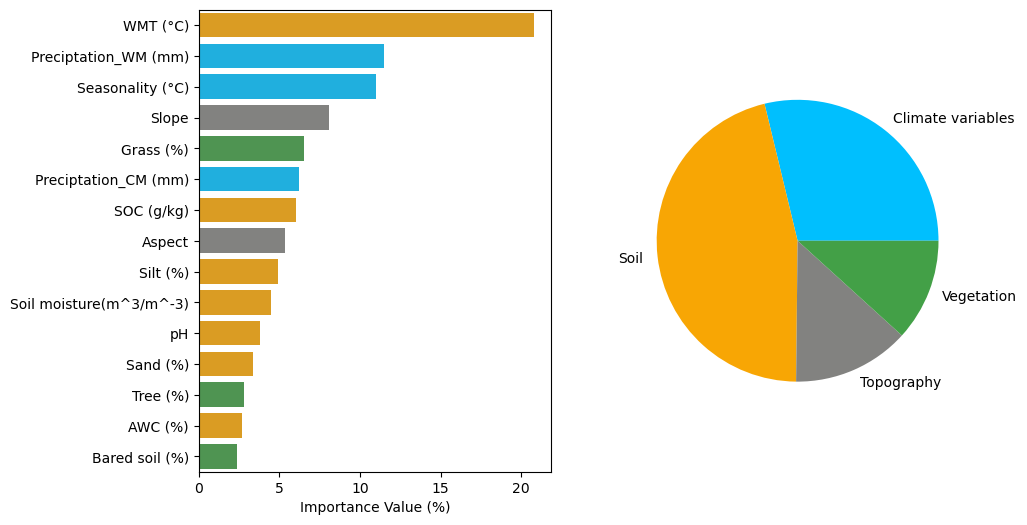

In [108]:
# Compute feature importances and categories
global_importances = pd.Series(gbr_best_model .feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=False, inplace=True)

Im_df = global_importances.to_frame().reset_index()
Im_df.columns = ['feature', 'importance_value']

def feature_stat(value):
    if value in ["Bared soil (%)", "Tree (%)", "Grass (%)"]:
        return "Vegetation"
    if value in ["AWC (%)", "SOC (g/kg)", "Silt (%)", "Sand (%)", "pH", 'Soil moisture(m^3/m^-3)', 'WMT (°C)']:
        return "Soil"
    if value in ["Slope", "Aspect"]:
        return "Topography"
    if value in ['Preciptation_CM (mm)', 'Preciptation_WM (mm)', 'Seasonality (°C)']:
        return "Climate variables"

Im_df['Category'] = Im_df['feature'].apply(feature_stat)
sum_value = Im_df['importance_value'].sum()
Im_df['importance_value (%)'] = Im_df['importance_value'].div(sum_value) * 100

# Create the barplot
sns.reset_defaults()
plt.figure(figsize=(10, 6))  # Increase the figure size to accommodate both plots

# Barplot
plt.subplot(1, 2, 1)  # Create a subplot for the barplot on the left
sns.barplot(x='importance_value (%)', y='feature', data=Im_df, hue='Category', dodge=False, palette=["#f8a604", "#00bffe", "#828280", "#43A047"]) 
plt.xlabel('Importance Value (%)')
plt.ylabel('') 

plt.gca().legend_.remove() 

# Pie chart
plt.subplot(1, 2, 2)  # Create a subplot for the pie chart on the right
Im = Im_df.groupby(['Category'])['importance_value (%)'].agg('sum').reset_index()
pie_wedge_collection = plt.pie(Im['importance_value (%)'], labels=Im['Category'], explode=[0, 0, 0, 0], 
                               colors=["#00bffe", "#f8a604", "#828280", "#43A047"])

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('none')


plt.show()

In [112]:
# Extract the names of the top 6 features
top_6_features = Im_df['feature'].head(6).tolist()
# Extract the names of all features except the top 6
remaining_features = Im_df['feature'].iloc[6:].tolist()
# Print the top 6 feature names
print("Top 6 features:", top_6_features)
# Print the remaining feature names
print("Remaining features (excluding top 6):", remaining_features)

Top 6 features: ['WMT (°C)', 'Preciptation_WM (mm)', 'Seasonality (°C)', 'Slope', 'Grass (%)', 'Preciptation_CM (mm)']
Remaining features (excluding top 6): ['SOC (g/kg)', 'Aspect', 'Silt (%)', 'Soil moisture(m^3/m^-3)', 'pH', 'Sand (%)', 'Tree (%)', 'AWC (%)', 'Bared soil (%)']


In [111]:
# Displaying variable Importance Table

# Rename the 'feature' column to 'Variable' for better clarity
Im_df.rename(columns={'feature': 'Variable'}, inplace=True)

# Format the DataFrame to display 'importance_value (%)' with 2 decimal places
styled_table = Im_df[['Variable', 'Category', 'importance_value (%)']].sort_values(by='importance_value (%)', ascending=False).style.format({
    "importance_value (%)": "{:.2f}"  # Format 'importance_value (%)' to 2 decimal places
})

# Display the formatted table
styled_table


,Variable,Category,importance_value (%)
0,WMT_Soil (°C),Soil,16.92
1,Preciptation_WM (mm),Climate variables,12.27
2,Seasonality (°C),Climate variables,11.13
3,Slope,Topography,9.85
4,Grass (%),Vegetation,6.34
5,Aspect,Topography,6.19
6,Preciptation_CM (mm),Climate variables,5.97
7,SOC (g/kg),Soil,5.49
8,pH,Soil,4.66
9,Soil moisture(m^3/m^-3),Soil,4.60


In [113]:
# Category Percentage 
# Calculate the total percentage of importance for each Category
category_percentages = Im_df.groupby('Category')['importance_value (%)'].sum().reset_index()

# Round the calculated percentages to two decimal places for better readability
category_percentages['importance_value (%)'] = category_percentages['importance_value (%)'].round(2)

# Display the resulting DataFrame showing the total percentage of importance for each Category
category_percentages

,Category,importance_value (%)
0,Climate variables,29.37
1,Soil,42.57
2,Topography,16.04
3,Vegetation,12.02


## Step 6 Partial Dependence Analysis Using GBR

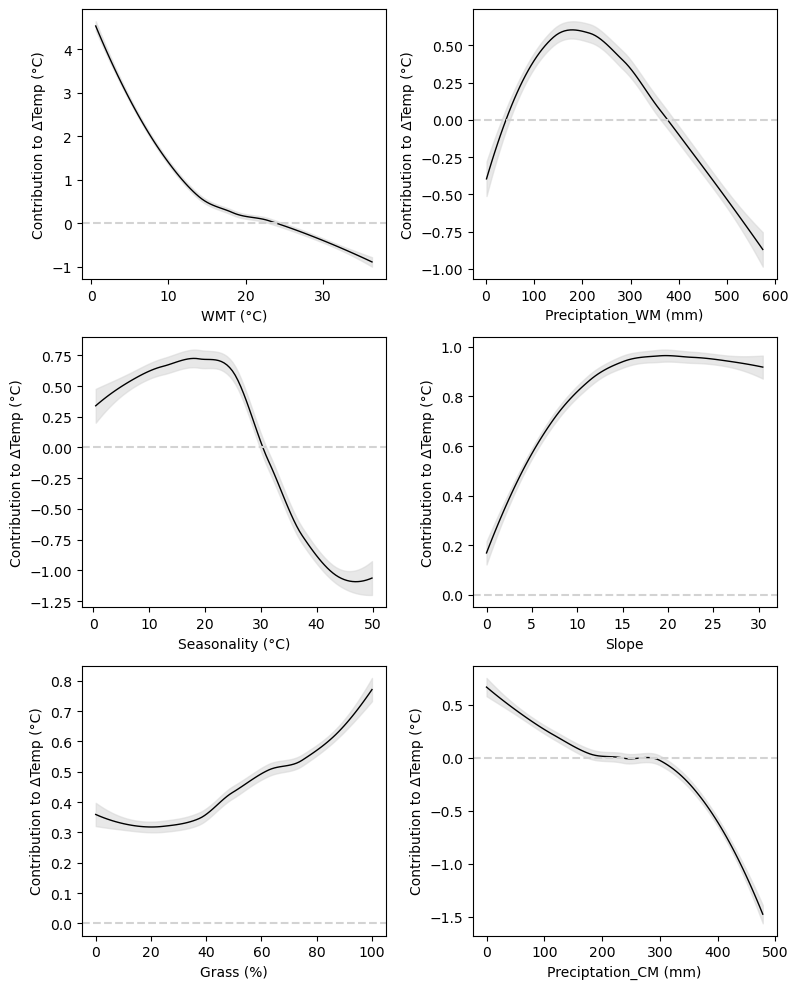

In [114]:
np.random.seed(1)  # for consistancy
# select relavent data
X_imputed = df_variable.drop(columns=["deltaMAF-BNN"])
y_imputed = df_variable[["deltaMAF-BNN"]].values 

gbr_best_model = GradientBoostingRegressor(
    n_estimators=130,
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='friedman_mse',
    learning_rate=0.04885511775611233,
    subsample=0.7350383938651441
).fit(X_imputed, y_imputed)

# Define the function to compute PDP and apply LOESS smoothing
def compute_pdp_loess(feature_name, X, model, frac=0.1):
    feature_values = np.linspace(np.min(X[feature_name]), np.max(X[feature_name]), 100)
    
    pdp_values = []
    for n in feature_values:
        X_pdp = X.copy()
        X_pdp[feature_name] = n
        
        # Compute the PDP
        pdp_value = np.mean(model.predict(X_pdp))
        pdp_values.append(pdp_value)
    
    # Apply LOESS smoothing
    l = loess(feature_values, pdp_values, frac=frac)
    l.fit()
    
    # Predict LOESS values and compute confidence intervals
    pred = l.predict(feature_values, stderror=True)
    conf = pred.confidence(alpha=0.05)
    
    smoothed_values = pred.values
    lower_conf = conf.lower
    upper_conf = conf.upper
    
    return smoothed_values, lower_conf, upper_conf, feature_values

# Select the 6 features to plot
selected_features = top_6_features

fig, axs = plt.subplots(3, 2, figsize=(8,10))
axs = axs.ravel()

# Process each feature and compute the LOESS smoothed PDP
for i, feature_name in enumerate(selected_features):
    #print(f"Processing feature: {feature_name}")
    smoothed_values, lower_conf, upper_conf, feature_values = compute_pdp_loess(
        feature_name, pd.DataFrame(X_imputed, columns=X.columns), 
        gbr_best_model, frac=0.1)
    
    # Plotting
    axs[i].plot(feature_values, smoothed_values, color='black', label='LOESS Smoothed Line', linewidth=1)
    axs[i].fill_between(feature_values, lower_conf, upper_conf, alpha=.5, color='#D3D3D3')
    axs[i].axhline(y=0, color='#D3D3D3', linestyle='--')
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Contribution to ΔTemp (°C)')

# Adjust the layout of subplots
plt.tight_layout()
plt.show()

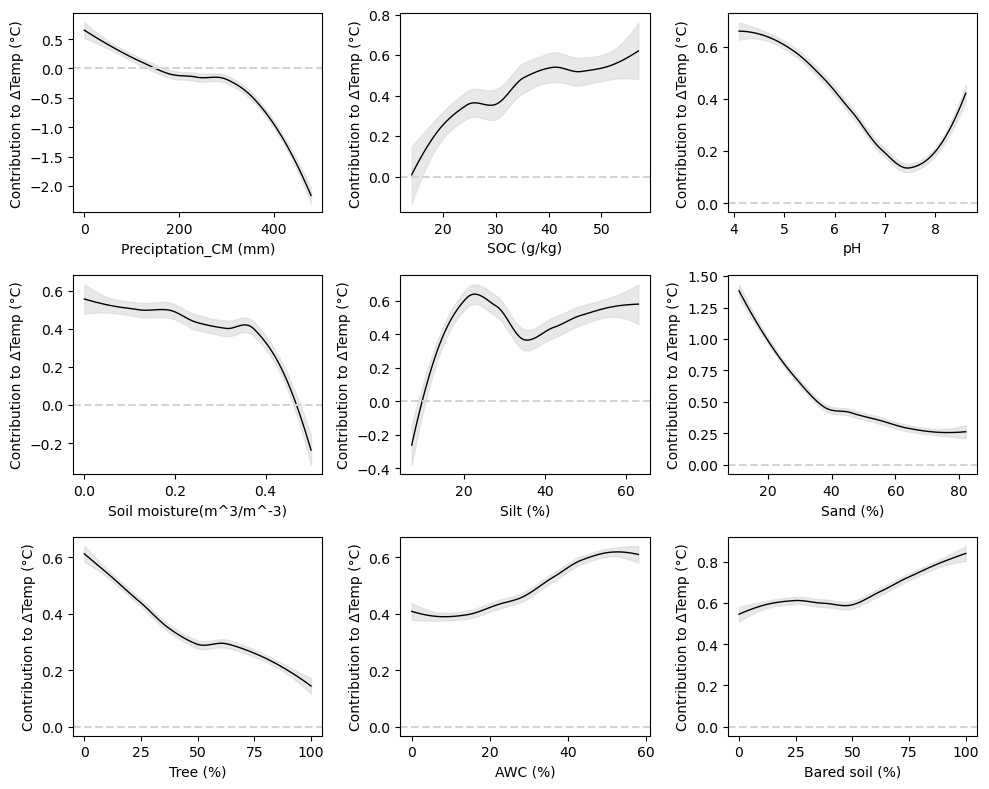

In [123]:
# Select the 9 features to plot
selected_features_secondary =remaining_features

fig, axs = plt.subplots(3, 3, figsize=(10,8))
axs = axs.ravel()

# Process each feature and compute the LOESS smoothed PDP
for i, feature_name in enumerate(selected_features_secondary):
   # print(f"Processing feature: {feature_name}")
    smoothed_values, lower_conf, upper_conf, feature_values = compute_pdp_loess(
        feature_name, pd.DataFrame(X_imputed, columns=X.columns), 
        gbr_best_model, frac=0.1)
    
    # Plotting
    axs[i].plot(feature_values, smoothed_values, color='black', label='LOESS Smoothed Line', linewidth=1)
    axs[i].fill_between(feature_values, lower_conf, upper_conf, alpha=.5, color='#D3D3D3')
    axs[i].axhline(y=0, color='#D3D3D3', linestyle='--')
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Contribution to ΔTemp (°C)')

# Adjust the layout of subplots
plt.tight_layout()
plt.show()

# Fig 3. Bacterial data anlysis

C:\Users\jie liang\AppData\Local\Temp\ipykernel_34908\705385513.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


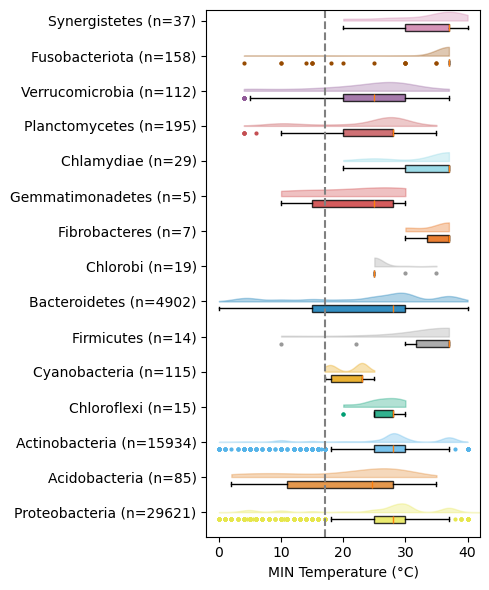

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\jie liang\Bacterial_data.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')


columns_to_fill = ['ID', 'designation_header', 'strain_number_header', 'is_type_strain_header', 'species', 'phylum']
df[columns_to_fill] = df[columns_to_fill].ffill()


df = df.dropna(subset=['phylum', 'MIN'])


df['phylum'] = df['phylum'].astype(str)


phylum_counts = df['phylum'].value_counts()
df['phylum_with_counts'] = df['phylum'].apply(lambda x: f"{x} (n={phylum_counts[x]})")


custom_order = [
    "Proteobacteria", "Acidobacteria", "Actinobacteria", "Chloroflexi",
    "Cyanobacteria", "Firmicutes", "Bacteroidetes", "Chlorobi", "Fibrobacteres", 
    "Gemmatimonadetes", "Chlamydiae", "Planctomycetes", "Verrucomicrobia", "Fusobacteriota",
    "Synergistetes"
]

custom_order_with_counts = [f"{phylum} (n={phylum_counts.get(phylum, 0)})" for phylum in custom_order]


harmonized_colors = ["#e6e64c", "#df7f20", "#56B4E9", "#009E73", "#E69F00", "#999999", 
                     "#0072B2", "#999999", "#E66100", "#cb3335", "#85D4E3", "#C44E52", 
                     "#905998", "#964A00", "#CC79A7"]


df['phylum_with_counts'] = pd.Categorical(df['phylum_with_counts'], categories=custom_order_with_counts, ordered=True)


grouped_data = [df[df['phylum_with_counts'] == phylum]['MIN'] for phylum in custom_order_with_counts]


fig, ax = plt.subplots(figsize=(5,6))


for i, (data, color) in enumerate(zip(grouped_data, harmonized_colors), start=1):
   
    flierprops = dict(marker='o', markerfacecolor=color, markersize=2, linestyle='none', markeredgecolor=color)
    
    
    ax.boxplot(data, patch_artist=True, vert=False, widths=0.2, positions=[i - 0.2], 
               boxprops=dict(facecolor=color, alpha=0.8), flierprops=flierprops)


vp = ax.violinplot(grouped_data, points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)


for idx, b in enumerate(vp['bodies']):
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx + 1, idx + 2)
    b.set_color(harmonized_colors[idx])


plt.yticks(np.arange(1, len(custom_order_with_counts) + 1), custom_order_with_counts)
plt.xlabel('MIN Temperature (°C)')
plt.axvline(x=17, color='grey', linestyle='--') 
plt.xlim(-2,42)

plt.tight_layout()
plt.show()


# Fig.4 SINDY constraint

In [3]:
import numpy as np
import time
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error   
import matplotlib.pyplot as plt
from sympy import sympify, symbols, evaluate
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


print(np.__version__)

1.26.4


## Step 1: SINDY anlysis

In [3]:

def TrainSTRidge(R, Ut, lam, d_tol, maxit=10, STR_iters=10,
                 l0_penalty=None, normalize=2, split=0.8, print_best_tol=True):
    """
    This function trains a predictor using STRidge.

    It runs over different values of tolerance and trains predictors on a training set, then evaluates them
    using a loss function on a holdout set.

    Please note published article has typo.  Loss function used here for model selection evaluates fidelity using 2-norm,
    not squared 2-norm.
    """

    # Split data into 80% training and 20% test, then WMT_soilrch for the best tolderance.
    np.random.seed(1)  # for consistancy
    n, _ = R.shape
    train = np.random.choice(n, int(n * split), replace=False)
    test = [i for i in np.arange(n) if i not in train]
    TrainR = R[train, :]
    TestR = R[test, :]
    TrainY = Ut[train, :]
    TestY = Ut[test, :]
    D = TrainR.shape[1]

    # Set up the initial tolerance and l0 penalty
    d_tol = float(d_tol)
    tol = d_tol
    # print(tol)
    if l0_penalty == None: l0_penalty = 0.001 * np.linalg.cond(R)

    # Get the standard least squares estimator
    w = np.zeros((D, 1))
    w_best = np.linalg.lstsq(TrainR, TrainY, rcond=None)[0]
    err_best = np.linalg.norm(TestY - TestR.dot(w_best), 2) + l0_penalty * np.count_nonzero(w_best)
    tol_best = 0
    err_ = []
    # Now increase tolerance until test performance decreases
    for iter in range(maxit):
        # Get a set of coefficients and error
        w = STRidge(TrainR, TrainY, lam, STR_iters, tol, normalize=normalize)
     #   print('stridge', w)
        err1 = np.linalg.norm(TestR.dot(w), 2)
        err_.append(err1)
        err = np.linalg.norm(TestY - TestR.dot(w), 2) + l0_penalty * np.count_nonzero(w)
        # Has the accuracy improved?
        if err <= err_best:
            err_best = err
            w_best = w
            tol_best = tol
            tol = tol + d_tol
       #     print('比较err：',tol)

        else:
            tol = max([0, tol - 2 * d_tol])
            d_tol = 2 * d_tol / (maxit - iter)
            tol = tol + d_tol
         #   print('tol_max:', d_tol, tol)
            w_best = w

    if print_best_tol: print("Optimal tolerance:", tol_best)

    return w_best, TrainR, TestR, TrainY, TestY, err_, tol_best


def STRidge(X0, y, lam, maxit, tol, normalize, print_results=True):
    """
    Sequential Threshold Ridge Regression algorithm for finding (hopefully) sparse
    approximation to X^{-1}y.  The idea is that this may do better with correlated observables.

    This assumes y is only one column
    """
    n, d = X0.shape
    X = np.zeros((n, d), dtype=np.float32)
    # First normalize data
    if normalize != 0:
        Mreg = np.zeros((d, 1))
        for i in range(0, d):
            Mreg[i] = 1.0 / (np.linalg.norm(X0[:, i], normalize))
            X[:, i] = Mreg[i] * X0[:, i]
    else:
        X = X0

    # Get the standard ridge esitmate
    if lam != 0:
        w = np.linalg.lstsq(X.T.dot(X) + lam * np.eye(d), X.T.dot(y), rcond=None)[0]
    else:
        w = np.linalg.lstsq(X, y, rcond=None)[0]
    num_relevant = d
    biginds = np.where(abs(w) > tol)[0]
   # print(biginds)
  #  print('In stridge tol is :', tol)
  #  print('w is:', w)
    # Threshold and continue
    for j in range(maxit):

        # Figure out which items to cut out
        smallinds = np.where(abs(w) < tol)[0]
   #     print('smallinds:', smallinds)
        new_biginds = [i for i in range(d) if i not in smallinds]

        # If nothing changes then stop
        if num_relevant == len(new_biginds):
            break
        else:
            num_relevant = len(new_biginds)

        # Also make sure we didn't just lose all the coefficients
        if len(new_biginds) == 0:
            if j == 0:
                if print_results: print("Tolerance too high - all coefficients set below tolerance")
                return w
            else:
                break
        biginds = new_biginds

        # Otherwise get a new guess
        w[smallinds] = 0
        if lam != 0:
            w[biginds] = \
                np.linalg.lstsq(X[:, biginds].T.dot(X[:, biginds]) + lam * np.eye(len(biginds)), X[:, biginds].T.dot(y),
                                rcond=None)[0]
        #    print('cutsmallinds', w)
        else:
            w[biginds] = np.linalg.lstsq(X[:, biginds], y, rcond=None)[0]

    # Now that we have the sparsity pattern, use standard least squares to get w
   # print(X[:, biginds])
   # print(y)
    if biginds != []: w[biginds] = np.linalg.lstsq(X[:, biginds], y, rcond=None)[0]

    if normalize != 0:
        return np.multiply(Mreg, w)
    else:
        return w


def evaluation(Y_true, Y_predict):
    MSE = mean_squared_error(Y_true, Y_predict)
    MAE = mean_absolute_error(Y_true, Y_predict)
    RMSE = MSE ** 0.5
    MAPE = np.mean(np.abs((Y_predict - Y_true) / Y_true)) * 100

    y_true = Y_true.flatten() if len(Y_true.shape) > 1 else Y_true.squeeze()
    y_predict = Y_predict.flatten() if len(Y_predict.shape) > 1 else Y_predict.squeeze()
    R, p_value = pearsonr(y_true, y_predict)
    return MSE, MAE, RMSE, MAPE, R



def SINDy(func_library, Y_ln, lam, dtol, maxit, func_name, x_max, y_max, savename, save_result):

     w_best, trainR, valR, trainY, valY, err_, tol_best = TrainSTRidge(func_library, Y_ln, lam, dtol, maxit, STR_iters=10,
                                                        l0_penalty=None,
                                                        normalize=2, split=0.8, print_best_tol=True)

   #  print('w_best:', w_best)

     w_final_np = np.array([float(w_best[x][0])/x_max[x]*y_max[0] for x in range(len(w_best))])
     # print(w_best)
     # print(x_max)
     # w_final_np = w_best[0,:]*x_max
   #  print(w_final_np)
     if save_result is True:
         np.savetxt('result/w_final_'+ str(savename) + '_' + str(lam) + '_' + str(dtol) + '.txt',
                    w_final_np, fmt='%.4f')
         equ = equation(w_final_np, func_name)
         with open('result/equation_'+str(savename) + '.txt', 'w',
                   encoding='utf-8') as f:
             f.write(equ)
             f.close()
     return w_final_np, equ


def equation(w, func_name):
    co = []
    fuc = []
    disc_eq_temp = []
    for i in range(w.shape[0]):
        if w[i] != 0:
            co.append(format(w[i], '.4f'))
            fuc.append(func_name[i])
            disc_eq_temp.append(str(format(w[i], '.3f')) + '*' + func_name[i])

    disc_eq = '+'.join(disc_eq_temp)
    equ = 'deltaMAF = ' + disc_eq
    print(equ)
    return equ


def prediction(equation, Precipwm_input, Constant_input,WMT_soil_input):
    s = sympify(equation)
    Precipwm, WMT_soil,constant,lnPrecipwm, lnWMT_soil,expPrecipwm,expWMT_soil = symbols('Precipwm WMT_soil constant lnPrecipwm lnWMT_soil expPrecipwm expWMT_soil')
    expr = s.subs([(Precipwm, Precipwm_input),(WMT_soil, WMT_soil_input),(expPrecipwm,np.log(Precipwm_input)),(constant,Constant_input),(expWMT_soil,np.log(WMT_soil_input)),
                   (lnPrecipwm, np.log(Precipwm_input)), (lnWMT_soil, np.log(WMT_soil_input))])
    expr_str = str(expr)
    result = float(eval(expr_str))
    return result


## Step 2: Constraint for temp bias

In [5]:


# Load the Excel file and select the relevant sheet
xls = pd.ExcelFile('gloabl soil brGDGT dataset - v1.xlsx')
df_check = pd.read_excel(xls, ' Temperature_Comparison')

# Select specific columns for analysis and remove rows with missing values
data = df_check[['hottest_month_pre', 'MWT_Soil(°C)', 'deltaMAF-WC bnn']].dropna()

# Display the number of rows after removing NA values
print("Number of rows after deleting NA values:", len(data))

# Extract input (X) and output (y) columns
input_data = data[['hottest_month_pre', 'MWT_Soil(°C)']]
output_data = data[['deltaMAF-WC bnn']]

# Remove outliers using the Z-score method
z_scores_soil = np.abs(stats.zscore(data[['MWT_Soil(°C)', 'deltaMAF-WC bnn']]))
filtered_entries_soil = (z_scores_soil < 3).all(axis=1)

z_scores_precip = np.abs(stats.zscore(data[['hottest_month_pre', 'deltaMAF-WC bnn']]))
filtered_entries_precip = (z_scores_precip < 3).all(axis=1)

# Combine the conditions to filter out outliers
filtered_data = data[filtered_entries_soil | filtered_entries_precip]
print("Number of rows after filtering outliers:", len(filtered_data))

# Update input and output variables with filtered data
input_filtered = filtered_data[['MWT_Soil(°C)', 'hottest_month_pre']]
output_filtered = filtered_data[['deltaMAF-WC bnn']]

# Display the column names of the filtered data
print("Columns in the filtered data:", filtered_data.columns)

# Start timing the process
time_start = time.time()

# Reassign filtered data as the main dataset for further processing
data = filtered_data

# Display the number of rows after filtering
print("Number of rows after filtering outliers:", len(data))

# Assign new input and output variables
input_data = data[['hottest_month_pre', 'MWT_Soil(°C)']]
output_data = data[['deltaMAF-WC bnn']]

# Rename input columns to shorter names for constructing the function library
input_data.columns = ['Precipwm', 'WMT_soil']

# Define a list of operations to create a function library
# 'Precipwm WMT_soil constant logPrecipwm logWMT_soil expPrecipwm expWMT_soil')
func_dict = [
    'Precipwm', 'WMT_soil', 'Precipwm*WMT_soil', 'Precipwm**2', 'WMT_soil**2', 
    'Precipwm**3', 'WMT_soil**3', 'lnPrecipwm', 'expWMT_soil', 'lnWMT_soil', 'expPrecipwm'
]

# Construct the function library by applying operations to the input variables
func_library = pd.DataFrame(index=input_data.index)
for op in func_dict:
    if '**' in op:
        col_name, operation = op.split('**')
        func_library[op] = input_data[col_name] ** int(operation)
    elif '*' in op:
        col1, col2 = op.split('*')
        func_library[op] = input_data[col1] * input_data[col2]
    elif 'ln' in op:
        col_name = op[2:]
        func_library[op] = np.log(input_data[col_name])
    elif 'exp' in op:
        col_name = op[3:]
        func_library[op] = np.exp(input_data[col_name])
    elif op == 'constant':
        func_library[op] = 1

# Combine the original inputs with the function library
func_lib_all = pd.concat([input_data, func_library], axis=1)
func_lib_all = np.array(func_lib_all, dtype=np.float64)
output_data = np.array(output_data, dtype=np.float64)

# Normalize the function library and output data
x_max = np.max(func_lib_all, axis=0)
funclib_norm = func_lib_all / x_max
y_max = np.max(output_data, axis=0)
y_norm = output_data / y_max

# Parameter settings for the SINDy algorithm
lam = 0.1  # Regularization parameter
tol = 0.8  # Tolerance for small coefficients
iters = 2  # Number of iterations
savename = 3
save_result = True

# Solve the sparse regression problem using the SINDy algorithm
w_final, equ = SINDy(funclib_norm, y_norm, lam, tol, iters, func_dict, x_max, y_max, savename, save_result=save_result)
w_final_round3 = np.round(w_final, 3)
num_nonzero = np.count_nonzero(w_final_round3)
print('Number of non-zero terms:', num_nonzero)

# Predict the output using the derived equation
maf_pre = []
for i in range(len(input_data)):
    _ = prediction(equ[11:], input_data['Precipwm'].iloc[i], 0.5, input_data['WMT_soil'].iloc[i])
    maf_pre.append(_)

# Evaluate the model's performance
MSE, MAE, RMSE, MAPE, R = evaluation(output_data, np.array(maf_pre))
print(f'MSE: {MSE:.2f}, RMSE: {RMSE:.2f}, MAPE: {MAPE:.2f}, R: {R:.2f}')

Number of rows after deleting NA values: 1986
Number of rows after filtering outliers: 1962
Columns in the filtered data: Index(['hottest_month_pre', 'MWT_Soil(°C)', 'deltaMAF-WC bnn'], dtype='object')
Number of rows after filtering outliers: 1962
Optimal tolerance: 1.6
deltaMAF = -0.318*WMT_soil+0.006*WMT_soil**2+0.900*lnPrecipwm
Number of non-zero terms: 3
MSE: 4.45, RMSE: 2.11, MAPE: 700.65, R: 0.41


In [21]:

results = []


for tol in np.arange(0.2, 1.3, 0.1):
    # Run the SINDy function to get w_final and equ
    w_final, equ = SINDy(funclib_norm, y_norm, lam, tol, iters, func_dict, x_max, y_max, savename, save_result=save_result)
    
    # Round w_final to 3 decimal places
    w_final_round3 = np.round(w_final, 3)
    
    # Calculate the number of non-zero terms
    num_nonzero = np.count_nonzero(w_final_round3)
    
    # Prediction
    maf_pre = []
    for i in range(len(input_data)):
        _ = prediction(equ[11:], input_data['Precipwm'].iloc[i], 0.5, input_data['WMT_soil'].iloc[i])
        maf_pre.append(_)
    
    # Evaluation
    MSE, MAE, RMSE, MAPE, R = evaluation(output_data, np.array(maf_pre))
    
    # Store tol, number_of_terms, and evaluation metrics in a dictionary and add to results list
    results.append({
        'tol': np.round(tol, 2),
        'number_of_terms': num_nonzero,
        'MSE': np.round(MSE, 2),
        'RMSE': np.round(RMSE, 2),
        'MAPE': np.round(MAPE, 2),
        'R': np.round(R, 2),
    })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)

# Output the final DataFrame
#print(results_df)


Optimal tolerance: 0.4
deltaMAF = -0.024*Precipwm+-0.057*WMT_soil+0.001*Precipwm*WMT_soil+-0.016*WMT_soil**2+-0.000*Precipwm**3+0.000*WMT_soil**3+1.013*lnPrecipwm+-0.000*expWMT_soil
Optimal tolerance: 0.6000000000000001
deltaMAF = -0.024*Precipwm+-0.082*WMT_soil+0.001*Precipwm*WMT_soil+-0.014*WMT_soil**2+-0.000*Precipwm**3+0.000*WMT_soil**3+1.036*lnPrecipwm
Optimal tolerance: 0.8000000000000002
deltaMAF = -0.024*Precipwm+-0.082*WMT_soil+0.001*Precipwm*WMT_soil+-0.014*WMT_soil**2+-0.000*Precipwm**3+0.000*WMT_soil**3+1.036*lnPrecipwm
Optimal tolerance: 1.0000000000000002
deltaMAF = -0.024*Precipwm+-0.082*WMT_soil+0.001*Precipwm*WMT_soil+-0.014*WMT_soil**2+-0.000*Precipwm**3+0.000*WMT_soil**3+1.036*lnPrecipwm
Optimal tolerance: 1.2000000000000002
deltaMAF = -0.020*Precipwm+-0.376*WMT_soil+0.001*Precipwm*WMT_soil+0.006*WMT_soil**2+-0.000*Precipwm**3+1.293*lnPrecipwm
Optimal tolerance: 1.4000000000000004
deltaMAF = -0.020*Precipwm+-0.376*WMT_soil+0.001*Precipwm*WMT_soil+0.006*WMT_soil**2+-0

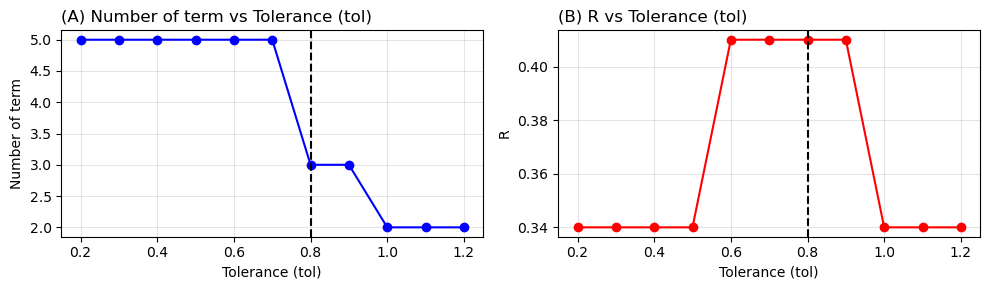

In [18]:

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)  
plt.plot(results_df['tol'], results_df['number_of_terms'], marker='o', linestyle='-', color='b')
#plt.xticks(np.arange(0, 2.1, 0.2))
plt.title('(A) Number of term vs Tolerance (tol)', loc='left')
plt.axvline(x=0.8, color='k', linestyle='--')  
plt.xlabel('Tolerance (tol)')
plt.ylabel('Number of term') 
plt.grid(True, color='gray', alpha=0.2)

# Second subplot: Y as R
plt.subplot(1, 2, 2)  
plt.plot(results_df['tol'], results_df['R'], marker='o', linestyle='-', color='r')
#plt.xticks(np.arange(0, 2.1, 0.2))
plt.axvline(x=0.8, color='k', linestyle='--')  
plt.title('(B) R vs Tolerance (tol)', loc='left')
plt.xlabel('Tolerance (tol)')
plt.ylabel('R')
plt.grid(True, color='gray', alpha=0.2)  

plt.tight_layout()  # Adjust spacing to avoid overlap
#plt.savefig('Tolerance-202400906.png', format='png')  # Save the figure as a PNG file


## Step 3. Schematic diagram (Fig. 4A)

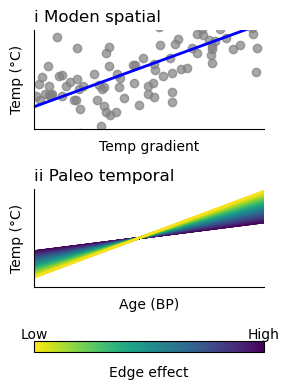

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib import cm



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 4), sharex=False, gridspec_kw={'height_ratios': [1,1.8]})


np.random.seed(42)
x = np.random.uniform(0, 30, 100)
y = 0.8 * x + 1 + np.random.normal(0, 5, 100)


y[(x >= 0) & (x <= 5)] += 3
y[(x >= 25) & (x <= 30)] -= 3


slope, intercept, r_value, _, std_err = linregress(x, y)


x_line = np.linspace(0, 30, 100)
y_line = slope * x_line + intercept

n = len(x)
se = std_err * np.sqrt(1/n + (x_line - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
confidence_interval = 1.96 * se  


y_upper = y_line + confidence_interval
y_lower = y_line - confidence_interval


mask = ~((x >= 0) & (x <= 5) & (y < (slope * x + intercept)))
mask &= ~((x >= 25) & (x <= 30) & (y > (slope * x + intercept)))
x_filtered = x[mask]
y_filtered = y[mask]


#ax1.scatter(x_filtered, y_filtered, color='gray', alpha=0.7, edgecolor='gray')
ax1.scatter(x_filtered, y_filtered, color='gray', alpha=0.7)


ax1.plot(x_line, y_line, color='blue', linewidth=2)


ax1.fill_between(x_line, y_lower, y_upper, color='blue', alpha=0.2)


ax1.set_xlim(0, 30)
ax1.set_ylim(0, 20)
ax1.set_xlabel('Temp gradient')
ax1.set_ylabel('Temp (°C)')


ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax1.set_title('i Moden spatial', loc='left')


ax1.grid(False)


ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')


ax1.spines['left'].set_position(('data', 0))
ax1.spines['bottom'].set_position(('data', 0))

ax1.tick_params(axis='both', which='both', length=0)


x = np.linspace(0, 22, 100)


slopes = np.linspace(0.4, 1.2, 2000)


colors = cm.viridis(np.linspace(0, 1, len(slopes)))


offset = 10  


for i, m in enumerate(slopes):
    y = m * (x - offset) + 15  
    ax2.plot(x, y, color=colors[i], alpha=0.2)

# Customize plot
ax2.set_xlim(0, 22)  # Set X axis from 0 to 22
ax2.set_ylim(0, 30)  # Set Y axis from 0 to 30
ax2.set_xlabel("Age (BP)")
ax2.set_ylabel("Temp (°C)")

# 去掉数字标签
ax2.set_xticklabels([])
ax2.set_yticklabels([])

# Remove top and right spines to only show X and Y axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_title('ii Paleo temporal', loc='left')


ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.tick_params(axis='both', which='both', length=0)


sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=0.6, vmax=1))
sm.set_array([])  # Only needed for colorbar
cbar = fig.colorbar(sm, ax=ax2, orientation='horizontal', pad=0.3, aspect=20)
cbar.set_label("Edge effect", rotation=0, labelpad=10)
cbar.ax.set_xticks([])  
cbar.ax.invert_xaxis()  


cbar.ax.text(0, 1.5, "Low", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=10)
cbar.ax.text(1, 1.5, "High", ha='center', va='center', transform=cbar.ax.transAxes, fontsize=10)


plt.tight_layout()
plt.show()


## Step 4: Spatial scales (Fig. 4B)

C:\Users\jie liang\AppData\Local\Temp\ipykernel_6024\2238928793.py:47: RuntimeWarning: invalid value encountered in log
  0.0061 * cropped_temperature**2 + 1.3128 * np.log(cropped_precipitation+1))


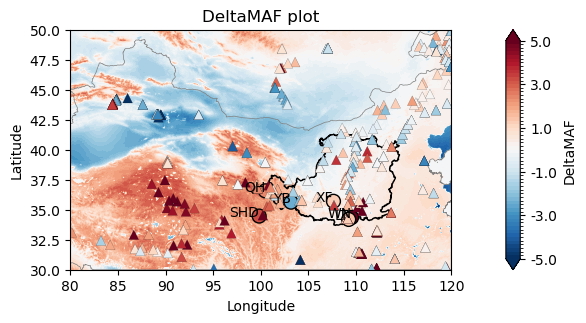

In [56]:
import rasterio
from rasterio.windows import from_bounds
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from shapely.geometry import box
from sklearn.impute import KNNImputer
from mpl_toolkits.axes_grid1 import make_axes_locatable


precipitation_file = "C:/Users/jie liang/Liang et al.,2024 code/wc2.1_30s_prec_07.tif"
temperature_file = "C:/Users/jie liang/Liang et al.,2024 code/soilT_7_0_5cm.tif"
shapefile_path = "C:/Users/jie liang/Liang et al.,2024 code/LoessPlateauRegion/LoessPlateauRegion.shp"
file_path = "C:/Users/jie liang/gloabl soil brGDGT dataset - v2.xlsx"

# Load raster data
with rasterio.open(precipitation_file) as precip_src:
    precipitation = precip_src.read(1, masked=True)
    precip_transform = precip_src.transform

with rasterio.open(temperature_file) as temp_src:
    temperature = temp_src.read(1, masked=True) / 10.0  # Adjust temperature
    temp_transform = temp_src.transform

# Define the extent for cropping (longitude and latitude)
bounds = (80, 30, 120, 50)
window = from_bounds(bounds[0], bounds[1], bounds[2], bounds[3], transform=precip_transform)

# Read the cropped raster data
with rasterio.open(precipitation_file) as precip_src:
    cropped_precipitation = precip_src.read(1, window=window, masked=True)

with rasterio.open(temperature_file) as temp_src:
    cropped_temperature = temp_src.read(1, window=window, masked=True) / 10.0  # Adjust temperature

# Load Excel data and filter by extent
df = pd.read_excel(file_path, sheet_name=" Temperature_Comparison")
extent = {'min_lat': 30, 'max_lat': 50, 'min_lon': 80, 'max_lon': 120}
filtered_df = df[(df['Latitude_degN'] >= extent['min_lat']) & (df['Latitude_degN'] <= extent['max_lat']) &
                 (df['Longitude_degE'] >= extent['min_lon']) & (df['Longitude_degE'] <= extent['max_lon'])]

# Calculate deltaMAF
deltaMAF = (-0.0210 * cropped_precipitation - 0.3779 * cropped_temperature +
            0.0007 * cropped_precipitation * cropped_temperature +
            0.0061 * cropped_temperature**2 + 1.3128 * np.log(cropped_precipitation+1))

# Fill missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5, weights="uniform")
deltaMAF_filled = imputer.fit_transform(deltaMAF)

# Load shape files
china_boundary = gpd.read_file("C:/Users/jie liang/Liang et al.,2024 code/chinashp.shp")
loess_plateau_shape = gpd.read_file(shapefile_path)

# Get raster CRS and align shape files
with rasterio.open(precipitation_file) as src:
    raster_crs = src.crs

loess_plateau_shape = loess_plateau_shape.to_crs(raster_crs)
china_boundary = china_boundary.to_crs(raster_crs)

# Create a boundary box
deltaMAF_bounds = box(bounds[0], bounds[1], bounds[2], bounds[3])
clipped_china_boundary = gpd.clip(china_boundary, deltaMAF_bounds)

# Scatter plot data
points_data = {
    "name": ["SHD", "QH", "XF", "WN", "YB", "LT"],
    "lat": [34.47, 36.57, 35.7, 34.35, 35.63, 34.19],
    "lon": [99.83, 100.48, 107.63, 109.53, 103.17, 109.23],
    "deltaMAF": [3.3, 2.49, 1.25, 6.36, -2.36, 1.49]
}
points_df = gpd.GeoDataFrame(points_data, geometry=gpd.points_from_xy(points_data["lon"], points_data["lat"]), crs="EPSG:4326")
points_df = points_df.to_crs(raster_crs)

# Plot the deltaMAF map
fig, ax = plt.subplots(figsize=(6, 4))
cmap = plt.cm.RdBu_r  # Reverse color map
levels = np.linspace(-5, 5, 61)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

cax = ax.imshow(deltaMAF_filled, cmap=cmap, extent=(bounds[0], bounds[2], bounds[1], bounds[3]), norm=norm)
ax.set_title("DeltaMAF plot")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Plot clipped China boundary and shape file
clipped_china_boundary.plot(ax=ax, edgecolor='grey', linewidth=0.5, facecolor='none')
loess_plateau_shape.plot(ax=ax, edgecolor='black', facecolor='none')


colors = cmap(norm(points_df["ΔTemp (°C)"]))
scatter = ax.scatter(points_df.geometry.x, points_df.geometry.y, color=colors, edgecolor='black', s=100)
for x, y, label in zip(points_df.geometry.x, points_df.geometry.y, points_df["name"]):
    ax.text(x, y, label, fontsize=10, ha='right', color='black')


filtered_gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df['Longitude_degE'], filtered_df['Latitude_degN']), crs="EPSG:4326")
filtered_gdf = filtered_gdf.to_crs(raster_crs)
filtered_colors = cmap(norm(filtered_gdf["deltaMAF-WC bnn"]))
ax.scatter(filtered_gdf.geometry.x, filtered_gdf.geometry.y, color=filtered_colors, edgecolor='black', s=50, marker='^', linewidths=0.1)



divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="3%", pad=0.05)  


cbar = fig.colorbar(cax, cax=cbar_ax, orientation='vertical', extend='both', ticks=np.arange(-5, 6, 2))
cbar.set_label('DeltaMAF')


cbar.set_ticks(np.arange(-5, 6, 2))  
cbar.set_ticklabels([f'{x:.1f}' for x in np.arange(-5, 6, 2)])  


plt.tight_layout()
plt.show()


## Step 5: temporal scales (Fig. 4C)

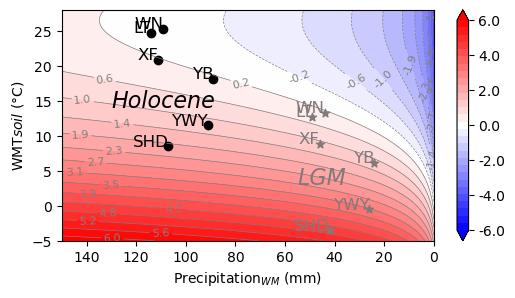

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap


cmap = LinearSegmentedColormap.from_list('custom_cmap', 
                                         [(0, 'blue'), 
                                          (0.5, 'white'), 
                                          (1, 'red')])


precipitation = np.linspace(0, 150, 200)
temperature = np.linspace(-5, 28, 200)

temperature_grid, precipitation_grid = np.meshgrid(temperature, precipitation)
points = np.array([[p, t] for t in temperature for p in precipitation])

# Function to calculate deltaMAF
def calculate_deltaMAF(precipitation, temperature):
    log_precipitation = np.log(precipitation + 1)
    return -0.318 * temperature + 0.006 * temperature**2 + 0.9 * log_precipitation

deltaMAF = calculate_deltaMAF(points[:, 0], points[:, 1])
grid_z = griddata(points, deltaMAF, (precipitation_grid, temperature_grid), method='linear')

# Data points
points_data = [
    (89, 18.1, "YB"),
    (111, 20.8, "XF"),
    (107, 8.5, "SHD"),
    (114, 24.7, "LT"),
    (91, 11.5, "YWY"),
    (109, 25.3, "WN")
]

# Calculate shifted coordinates for blue points
shifted_points_data = [(x - 65, y - 12, label) for x, y, label in points_data]

# Create the plot
fig, ax = plt.subplots(figsize=(6, 3))

# Set color range and levels for the contour plot
levels = np.linspace(-6, 6, 30)
c = ax.contourf(precipitation_grid, temperature_grid, grid_z, cmap=cmap, levels=levels, extend='both')
contours = ax.contour(precipitation_grid, temperature_grid, grid_z, colors='gray', linewidths=0.5, levels=levels)
ax.clabel(contours, inline=True, fontsize=8, fmt='%.1f')


ax.invert_xaxis()


for x, y, label in points_data:
    ax.scatter(x, y, color='black', marker='o')
    ax.text(x, y, label, color='black', fontsize=12, ha='right')


for x, y, label in shifted_points_data:
    ax.scatter(x, y, color='#827A7A', marker='*')
    ax.text(x, y, label, color='#827A7A', fontsize=12, ha='right')


ax.set_xlabel('Precipitation$_{WM}$ (mm)')
ax.set_ylabel('WMT${soil}$ (°C)')

cbar = fig.colorbar(c, ax=ax, orientation='vertical', extend='both')
cbar.set_ticks(np.arange(-6, 7, 2)) 
cbar.set_ticklabels([f'{x:.1f}' for x in np.arange(-6, 7, 2)])  

ax.text(130, 14, 'Holocene', color='black', fontsize=16, fontstyle='italic')
ax.text(55, 3, 'LGM', color='#827A7A', fontsize=16, fontstyle='italic')


ax.tick_params(axis='x', direction='out', which='both')
ax.tick_params(axis='y', direction='out', which='both')


plt.show()


# Fig.5 Comparison of reconstracted temperature with and without constraints

## Fig. 5D

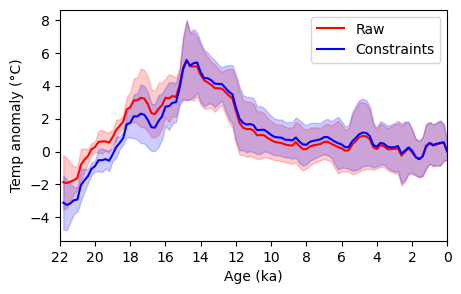

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


file_path = "C:/Users/jie liang/gloabl soil brGDGT dataset - v2.xlsx"
data_loess = pd.read_excel(file_path, sheet_name="CLP_loess")

# Group by 200-year intervals and calculate the mean of CC_delta_bias_deg_C
data_loess['age_group'] = (data_loess['Age_yr'] // 200) * 200
cc_delta_bias_avg = data_loess.groupby('age_group')['CC_delta_bias_deg_C'].mean().reset_index()


def interpolate_data(age, temp):
    new_age = np.arange(np.nanmin(age), np.nanmax(age) + 100, 100)
    interp_values = interpolate.interp1d(age, temp, bounds_error=False, fill_value='extrapolate')(new_age)
    return pd.DataFrame({'Age': new_age, 'Temperature': interp_values})

# Interpolate data for each location
locations = ['YB', 'WN', 'XF', 'LT', 'YWY', 'SHD']
interpolated_list = {loc: interpolate_data(data_loess[f'Age_{loc}_yr'], data_loess[f'{loc}_deg_C']) for loc in locations}

# Combine all interpolated data into a single DataFrame with location labels
data_long = pd.concat([df.assign(location=loc) for loc, df in interpolated_list.items()], ignore_index=True)

# Calculate anomaly based on the first temperature value for each location
data_long['anomaly'] = data_long.groupby('location')['Temperature'].transform(lambda x: x - x.iloc[0])

# Group by 200-year intervals and calculate the mean and standard deviation of the anomaly
data_long['Age_group'] = (data_long['Age'] // 200) * 200
summary_anomaly = data_long.groupby('Age_group')['anomaly'].agg(['mean', 'std']).reset_index()

# Merge anomaly data with cc_delta_bias_avg and compute adjusted anomaly
data_combined = summary_anomaly[summary_anomaly['Age_group'] <= 21800].merge(cc_delta_bias_avg, left_on='Age_group', right_on='age_group')
data_combined['adjusted_anomaly'] = data_combined['mean'] - data_combined['CC_delta_bias_deg_C']

# Normalize mean_anomaly and adjusted_anomaly, compute confidence intervals
first_mean, first_adjusted = data_combined['mean'].iloc[0], data_combined['adjusted_anomaly'].iloc[0]
data_combined['mean'] -= first_mean
data_combined['adjusted_anomaly'] -= first_adjusted
data_combined['ci_lower'], data_combined['ci_upper'] = data_combined['mean'] - data_combined['std'], data_combined['mean'] + data_combined['std']
data_combined['adjusted_ci_lower'], data_combined['adjusted_ci_upper'] = data_combined['adjusted_anomaly'] - data_combined['std'], data_combined['adjusted_anomaly'] + data_combined['std']

# Convert age group to kyr (thousands of years)
data_combined['Age_group_kyr'] = data_combined['Age_group'] / 1000

# Plot the mean anomaly and adjusted anomaly with confidence intervals
plt.figure(figsize=(5, 3))
plt.plot(data_combined['Age_group_kyr'], data_combined['mean'], label='Raw', color='red')
plt.fill_between(data_combined['Age_group_kyr'], data_combined['ci_lower'], data_combined['ci_upper'], color='red', alpha=0.2)
plt.plot(data_combined['Age_group_kyr'], data_combined['adjusted_anomaly'], label='Constraints', color='blue')
plt.fill_between(data_combined['Age_group_kyr'], data_combined['adjusted_ci_lower'], data_combined['adjusted_ci_upper'], color='blue', alpha=0.2)


plt.xlabel('Age (ka)')
plt.xticks(np.arange(0, 24, 2))
plt.xlim(0, 22)
plt.ylabel('Temp anomaly (°C)')
plt.legend()
plt.grid(False)
plt.gca().invert_xaxis()
plt.show()


## Fig. 5G

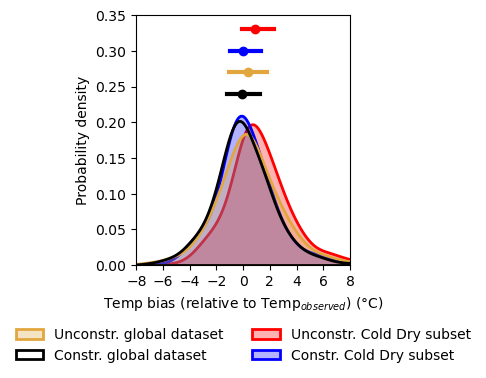

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


xls = pd.ExcelFile('gloabl soil brGDGT dataset - v2.xlsx')
data = pd.read_excel(xls, ' Temperature_Comparison')


df_soil = data[(data['MWT_Soil(°C)'] < 17) & (data['hottest_month_pre'] < 200)]
df_soil.dropna(subset=['deltaMAF-WC bnn', 'newbias'], inplace=True)

df_geo = data
df_geo.dropna(subset=['deltaMAF-WC bnn', 'newbias'], inplace=True)


df_soil_melted = pd.melt(df_soil, value_vars=['deltaMAF-WC bnn', 'newbias'],
                         var_name='Variable', value_name='Value')
df_geo_melted = pd.melt(df_geo, value_vars=['deltaMAF-WC bnn', 'newbias'],
                        var_name='Variable', value_name='Value')


df_soil_melted['Category'] = 'Cold_dry'
df_geo_melted['Category'] = 'Geo Extent'


df_combined = pd.concat([df_soil_melted, df_geo_melted])


fig, ax = plt.subplots(figsize=(4, 4))

combined_palette = {
    'Cold_dry, deltaMAF-WC bnn': 'red',
    'Cold_dry, newbias': 'blue',
    'Geo Extent, deltaMAF-WC bnn': '#e1a73e',
    'Geo Extent, newbias': 'black'
}

legend_labels = {
    'Cold_dry deltaMAF-WC bnn': 'Unconstr. Cold Dry subset',
    'Cold_dry newbias': 'Constr. Cold Dry subset',
    'Geo Extent deltaMAF-WC bnn': 'Unconstr. global dataset',
    'Geo Extent newbias': 'Constr. global dataset'
}


for category in df_combined['Category'].unique():
    subset = df_combined[df_combined['Category'] == category]
    for variable in subset['Variable'].unique():
        alpha_value = 0 if combined_palette[f'{category}, {variable}'] == 'black' else 0.3
        sns.kdeplot(
            data=subset[subset['Variable'] == variable],
            x='Value',
            fill=True,
            common_norm=False,
            alpha=alpha_value,
            ax=ax,
            color=combined_palette[f'{category}, {variable}'], 
            bw_adjust=1.5, linewidth=2,
            label=legend_labels[f'{category} {variable}']
        )


ax.set_ylabel('Probability density')
ax.set_xlabel('Temp bias (relative to Temp$_{observed}$) (°C)')
ax.set_xticks(range(-8, 9, 2)) 
ax.set_xlim(-8, 8)
ax.set_ylim(0, 0.35)


positions = {'Geo Extent': [0.27, 0.24], 'Cold_dry': [0.33, 0.30]}
for category in df_combined['Category'].unique():
    subset = df_combined[df_combined['Category'] == category]
    for i, variable in enumerate(subset['Variable'].unique()):
        y_pos = positions[category][i]
        median_value = subset[subset['Variable'] == variable]['Value'].median()
        q1 = subset[subset['Variable'] == variable]['Value'].quantile(0.25)
        q3 = subset[subset['Variable'] == variable]['Value'].quantile(0.75)
        ax.plot([q1, q3], [y_pos, y_pos], color=combined_palette[f'{category}, {variable}'], lw=3)
        ax.plot(median_value, y_pos, 'o', color=combined_palette[f'{category}, {variable}'])


handles, labels = ax.get_legend_handles_labels()
new_order = [2, 3, 0, 1]
handles = [handles[i] for i in new_order]
labels = [labels[i] for i in new_order]


ax.legend(handles, labels, frameon=False, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

plt.tight_layout()
plt.show()


In [30]:

for category in df_combined['Category'].unique():
    subset = df_combined[df_combined['Category'] == category]
    for i, variable in enumerate(subset['Variable'].unique()):
        y_pos = positions[category][i]
        median_value = round(subset[subset['Variable'] == variable]['Value'].median(), 0)
        q1 = round(subset[subset['Variable'] == variable]['Value'].quantile(0.25), 0)
        q3 = round(subset[subset['Variable'] == variable]['Value'].quantile(0.75), 0)
        print(f"Category: {category}, Variable: {variable}, Median: {median_value}, Q1: {q1}, Q3: {q3}")
        


Category: Cold_dry, Variable: deltaMAF-WC bnn, Median: 1.0, Q1: -0.0, Q3: 2.0
Category: Cold_dry, Variable: newbias, Median: -0.0, Q1: -1.0, Q3: 1.0
Category: Geo Extent, Variable: deltaMAF-WC bnn, Median: 0.0, Q1: -1.0, Q3: 2.0
Category: Geo Extent, Variable: newbias, Median: -0.0, Q1: -1.0, Q3: 1.0


# Supplymentary Fig. 1

C:\Users\jie liang\AppData\Local\Temp\ipykernel_9112\1562981815.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2)


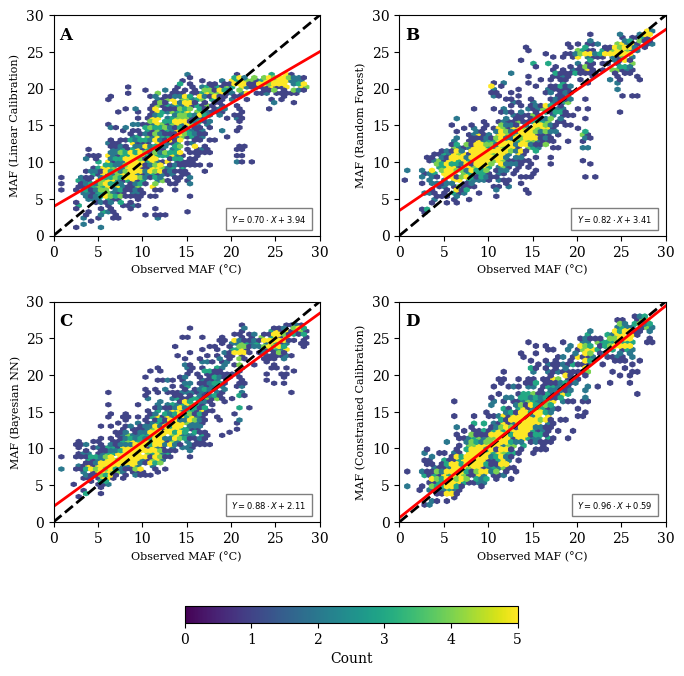

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error, mean_absolute_error


xls = pd.ExcelFile('gloabl soil brGDGT dataset - v2.xlsx')
df_check = pd.read_excel(xls, ' Temperature_Comparison')
df_clean = df_check.dropna(subset=['newcal', 'MAF_WorldClim(°C)', 'MAF_linear', 'MAF-WC_FROG0', 'MAFterr_soil.pred_BNN'])


x = df_clean['MAF_WorldClim(°C)']


y1 = df_clean['MAF_linear']  # Linear Calibration
y2 = df_clean['MAF-WC_FROG0']  # Random Forest Calibration
y3 = df_clean['MAFterr_soil.pred_BNN']  # Bayesian Neural Network Calibration
y4 = df_clean['newcal']  # This Study Constrained Calibration


fig, axs = plt.subplots(2, 2, figsize=(7.2, 7.2))

def plot_with_regression(ax, x, y, y_label, title, label_pos):

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    hb = ax.hexbin(x, y, gridsize=50, cmap='viridis', mincnt=1, vmin=0, vmax=5)

    ax.plot([0, 30], [0, 30], 'k--', lw=2, label='1:1 Line')
    

    ax.plot([0, 30], [slope * 0 + intercept, slope * 30 + intercept], 'r-', lw=2, label='Regression Line')
    

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_xticks(np.arange(0, 31, 5)) 
    ax.set_yticks(np.arange(0, 31, 5)) 
    
  
    ax.set_xlabel('Observed MAF (°C)', fontsize=8)
    ax.set_ylabel(y_label, fontsize=8)
    ax.set_title(title, fontsize=9)
    

    textstr = f'$Y = {slope:.2f} \cdot X + {intercept:.2f}$' 
    ax.text(0.95, 0.05, textstr, transform=ax.transAxes, fontsize=6,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
    
   
    ax.text(0.02, 0.95, label_pos, transform=ax.transAxes, fontsize=12, fontweight='bold', verticalalignment='top')

    return hb

# Fig. A: Linear Calibration
hb1 = plot_with_regression(axs[0, 0], x, y1, 'MAF (Linear Calibration)', '', 'A')

# Fig. B: Random Forest Calibration
hb2 = plot_with_regression(axs[0, 1], x, y2, 'MAF (Random Forest)', '', 'B')

# Fig. C: Bayesian Neural Network Calibration
hb3 = plot_with_regression(axs[1, 0], x, y3, 'MAF (Bayesian NN)', '', 'C')

# Fig. D: This Study Constrained Calibration
hb4 = plot_with_regression(axs[1, 1], x, y4, 'MAF (Constrained Calibration)', '', 'D')


cbar = fig.colorbar(hb1, ax=axs, orientation='horizontal', fraction=0.03, pad=0.2)  
cbar.set_label('Count', fontsize=10) 


plt.tight_layout(pad=2)
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.25) 


plt.rc('font', family='serif')
plt.show()
